In [1]:
# import numeric laibary
import numpy as np

# import pandas laibary
import pandas as pd

# import plotting laibary
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Regression model
from sklearn.linear_model import LogisticRegression

# Regressor model
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# import ensmble meethod
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
# metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import plot_roc_curve

In [4]:
# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [5]:
# loaded dataset
ds=pd.read_csv('income.csv')
ds

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
# fit into dataframe
df=pd.DataFrame(data=ds)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
# upper top 5 rows
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [8]:
# lower bottom 5 rows
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [9]:
# random row
df.sample()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
6323,39,Private,126675,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,>50K


In [10]:
# check white spaces
df=df.replace(" ",np.nan)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
# get dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Information about dataset-->
1. In our datset number of rows are 32560 and number of columns are 15.
2. In our datset no null values are present.
3. In dataset 6 columns out of 15 columns are in int type and 9 columns are out of 15 columns are in object type.

In [12]:
# check total null values in dataset
df.isnull().sum().sum()

0

No null values are present

In [13]:
# check null values in each coluumns
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

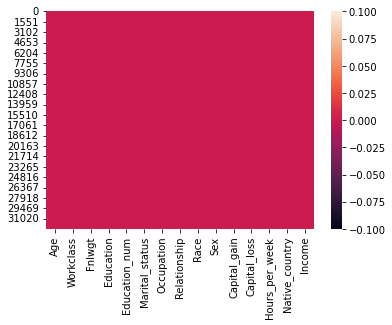

In [14]:
# plot graph for null values
sns.heatmap(df.isnull())

## separate both type int and object type dataset 

# OBJECT TYPE DATASET

In [15]:
df1=df.select_dtypes('object')
df1

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


### TASK--->The prediction task is to determine whether a person makes over $50K a year.

In [16]:
# check null values in object type data
df1.isnull().sum()

Workclass         0
Education         0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Native_country    0
Income            0
dtype: int64

# Check Unique Values

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

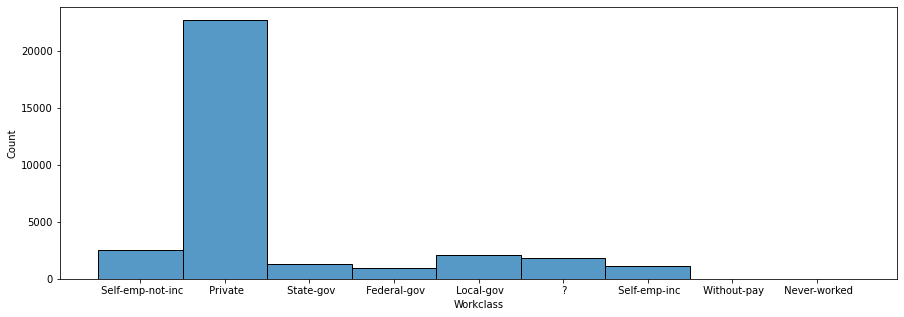

In [17]:
plt.figure(figsize=(15,5))
sns.histplot(df.Workclass)
df.Workclass.unique()

In Work class variable P types of companies who worked here and In this major work done by Private Company

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

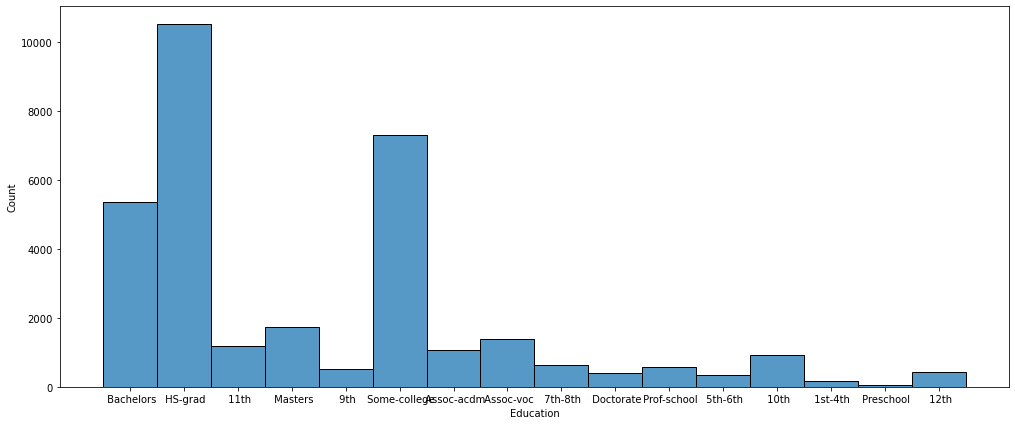

In [18]:
plt.figure(figsize=(17,7))
sns.histplot(df1.Education)
df1.Education.unique()

In the Education variable 16 types of education-based jobs and in this jobs high educated comes from Higher School diploma

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

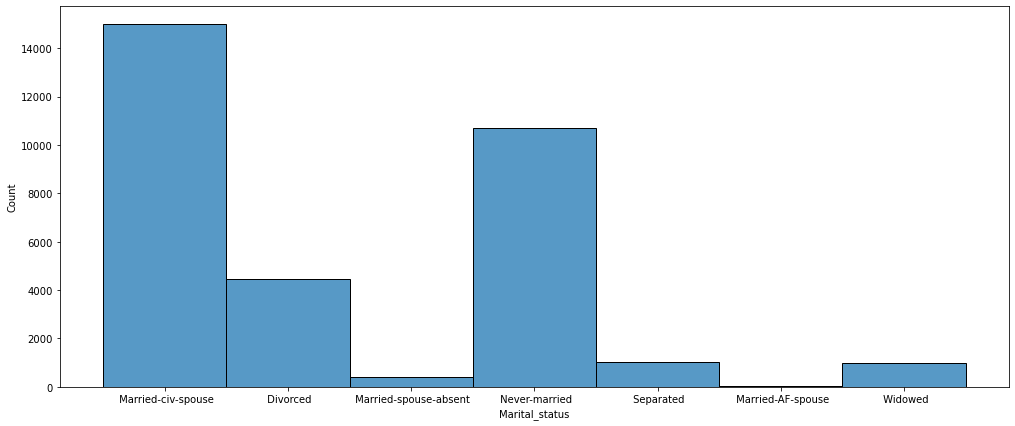

In [19]:
plt.figure(figsize=(17,7))
sns.histplot(df1.Marital_status)
df1.Marital_status.unique()

in marital status, 7 types come and in this 7 types major employment are Married-civ-spouse(Civilian-supouse)

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

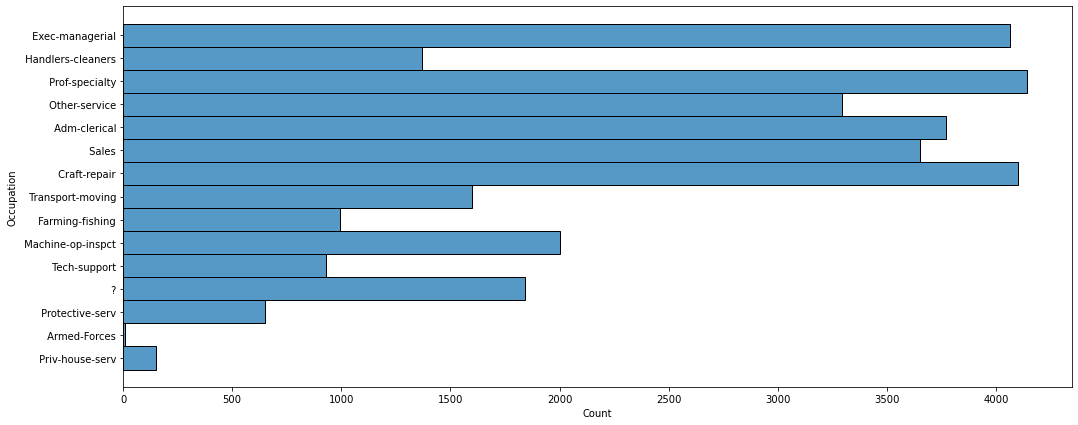

In [20]:
plt.figure(figsize=(17,7))
sns.histplot(y=df1.Occupation)
df1.Occupation.unique()

In occupation variable 15 types of occupation types employment, In this major employment comes from Prof-specialty

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

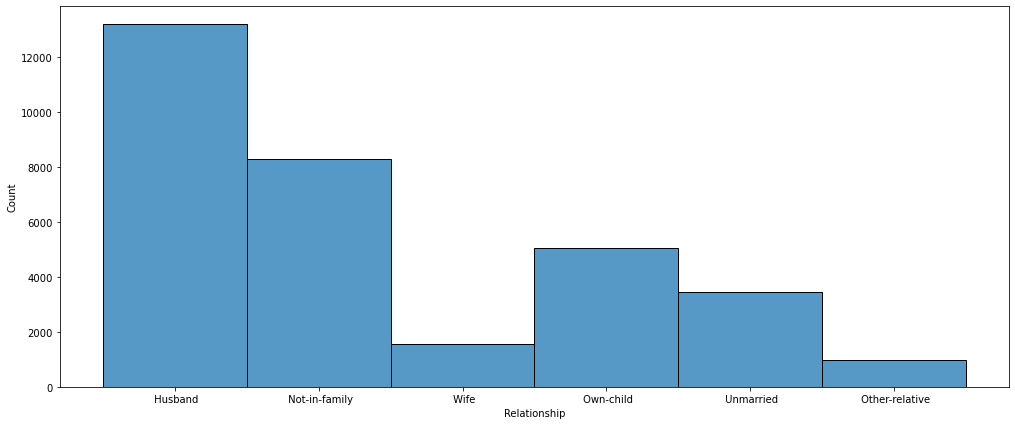

In [21]:
plt.figure(figsize=(17,7))
sns.histplot(df1.Relationship)
df1.Relationship.unique()

In Relationship variable 6 types of employess and in this Husband types is come more

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

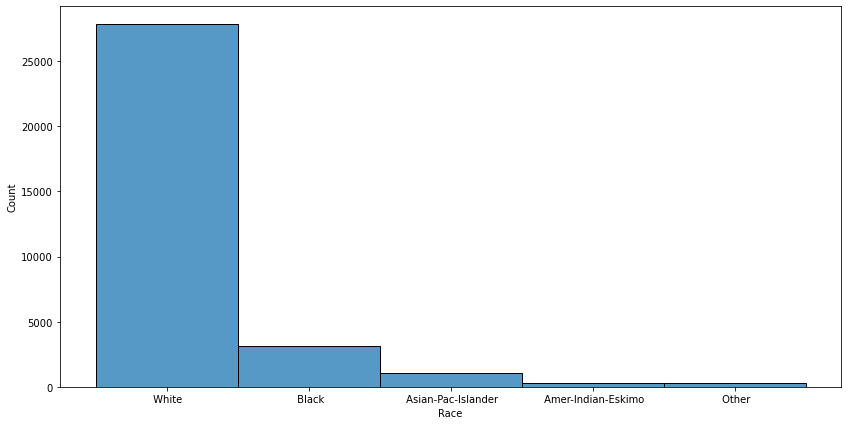

In [22]:
plt.figure(figsize=(14,7))
sns.histplot(df1.Race)
df1.Race.unique()

Major employers are white, It is bcoz the data come from the USA so many people are from their country

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

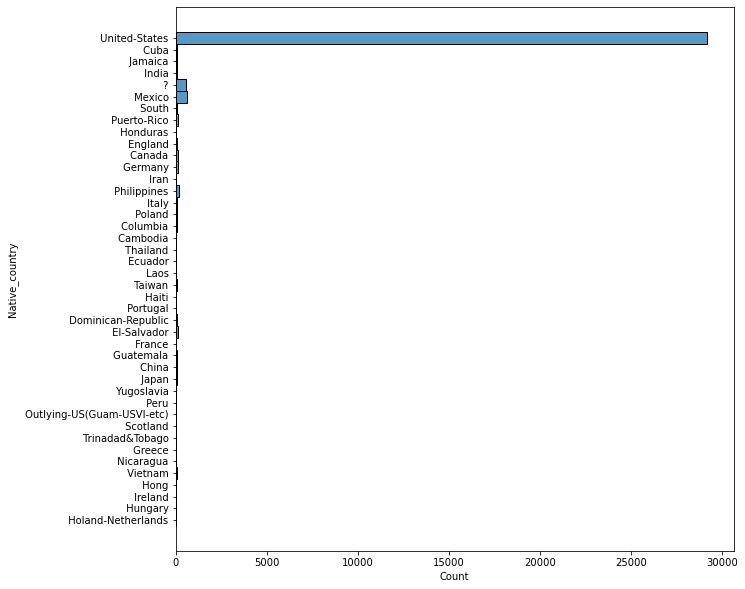

In [23]:
plt.figure(figsize=(10,10))
sns.histplot(y=df1.Native_country)
df1.Native_country.unique()

In the census income chart, major data takes from the USA, major employers come from the USA

# Plot Bivarient Chart

In [24]:
df1['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [25]:
df1['Class']=np.where(df1['Income']=='<=50K',0,1)

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le=LabelEncoder()

In [28]:
df1['Class']=le.fit_transform(df1['Income'])

In [29]:
df1['Class']

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Class, Length: 32560, dtype: int32

In [30]:
df1

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income,Class
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,0
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,0
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,0
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K,0
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K,0
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K,1
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K,0
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K,0


In [31]:
def object_type(df1,variable,target='Class',invert_axis=False):
    fig,ax=plt.subplots(ncols=2,figsize=(20,10))
    
    #countplot for distribution along with target variable
    #invert axis variable helps to inter change the axis so that names of categories doesn't overlap
    if invert_axis==False:
        sns.countplot(x=variable,hue='Income',data=df1,ax=ax[0])
    else:
        sns.countplot(y=variable,hue='Income',data=df1,ax=ax[0])
    ax[0].set_title(f"Comparision between {variable} and {target}")
    
    #plot the effect of variable on income
    if invert_axis==False:
        sns.barplot(x=variable,y=target,data=df1)
    else:
        sns.barplot(y=variable,x=target,data=df1)
        
    ax[1].set_title(f"Income in {variable}")
    ax[1].set_ylabel('Average of Income')
    plt.tight_layout()
    
    plt.show()

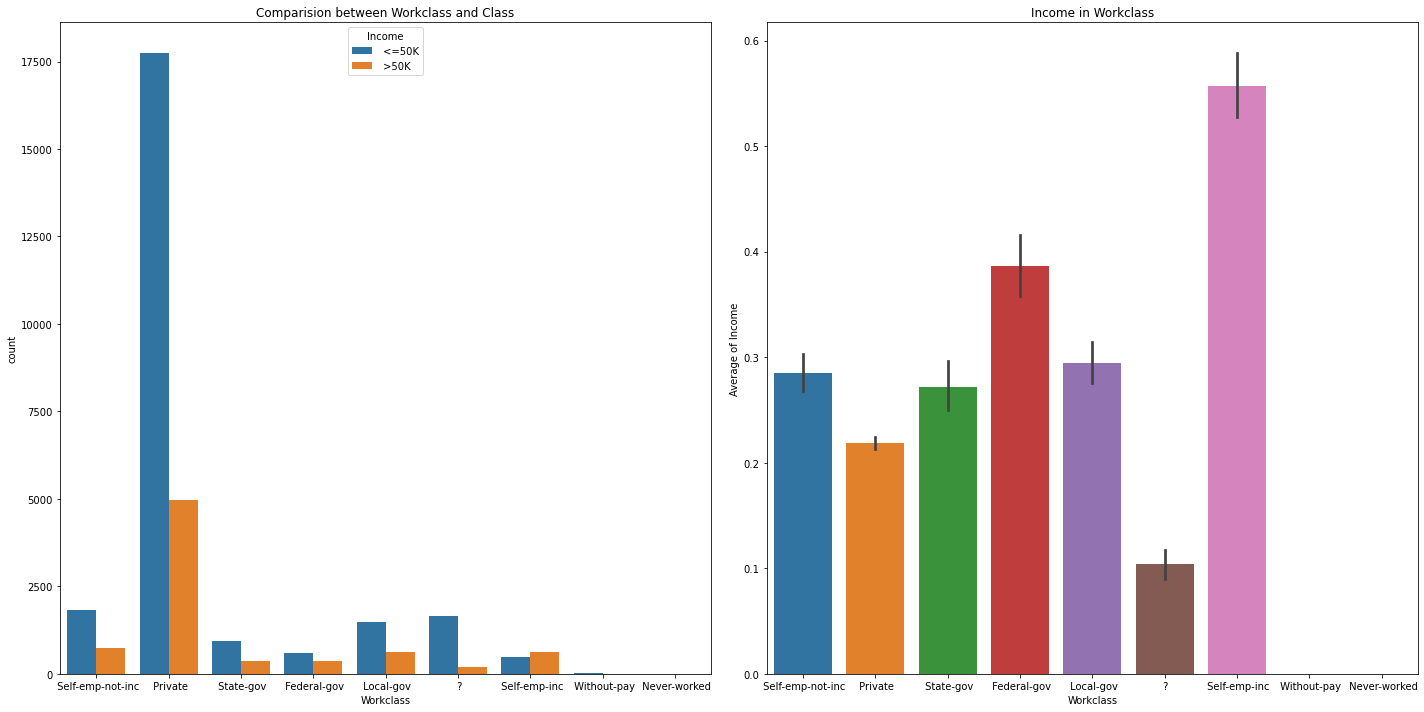

In [32]:
object_type(df1,variable='Workclass')

As we have seen, in In work class variable employers are from PrivPrivatepanies and inomincometheir is low compared to 50k.
And company owners' and self employers' income is high.

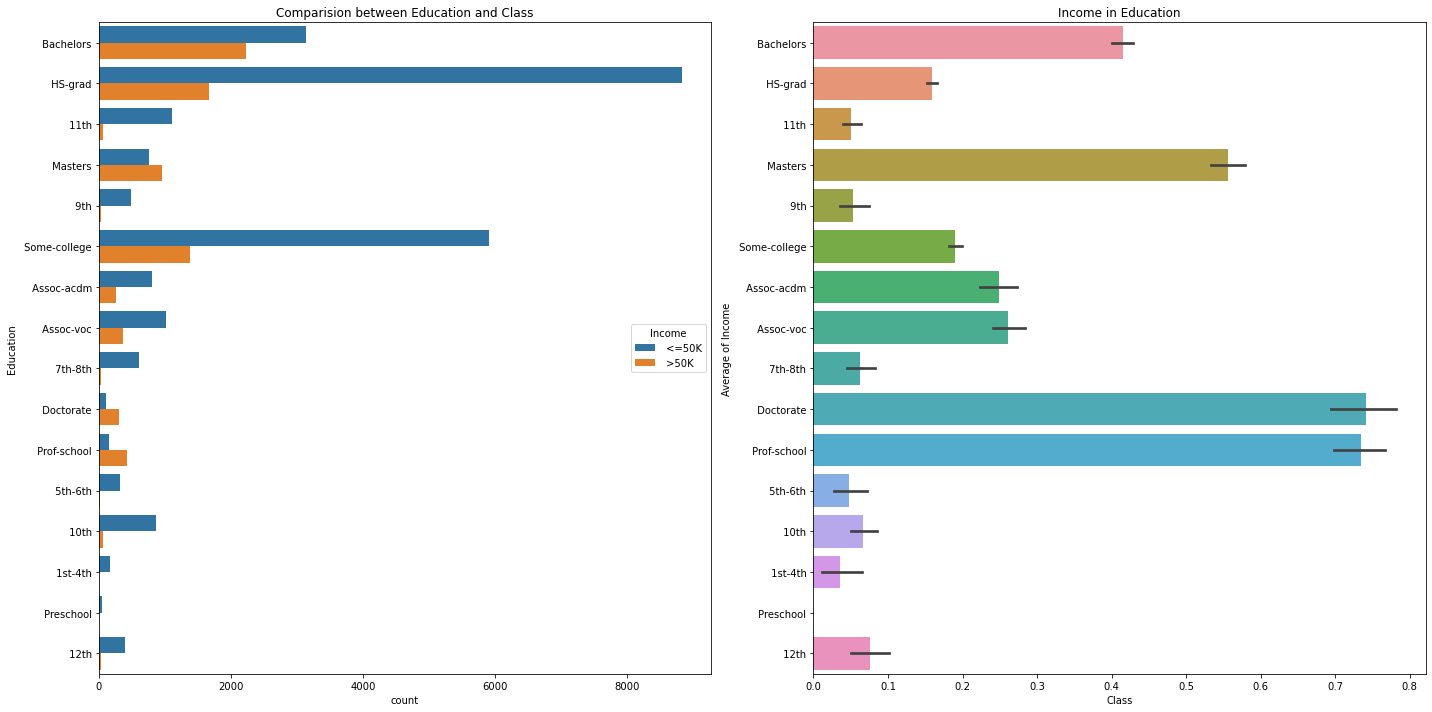

In [33]:
object_type(df1,variable='Education',invert_axis=True)

Many employers belong to HS-GRAD background education but high income in DOCTORATE education

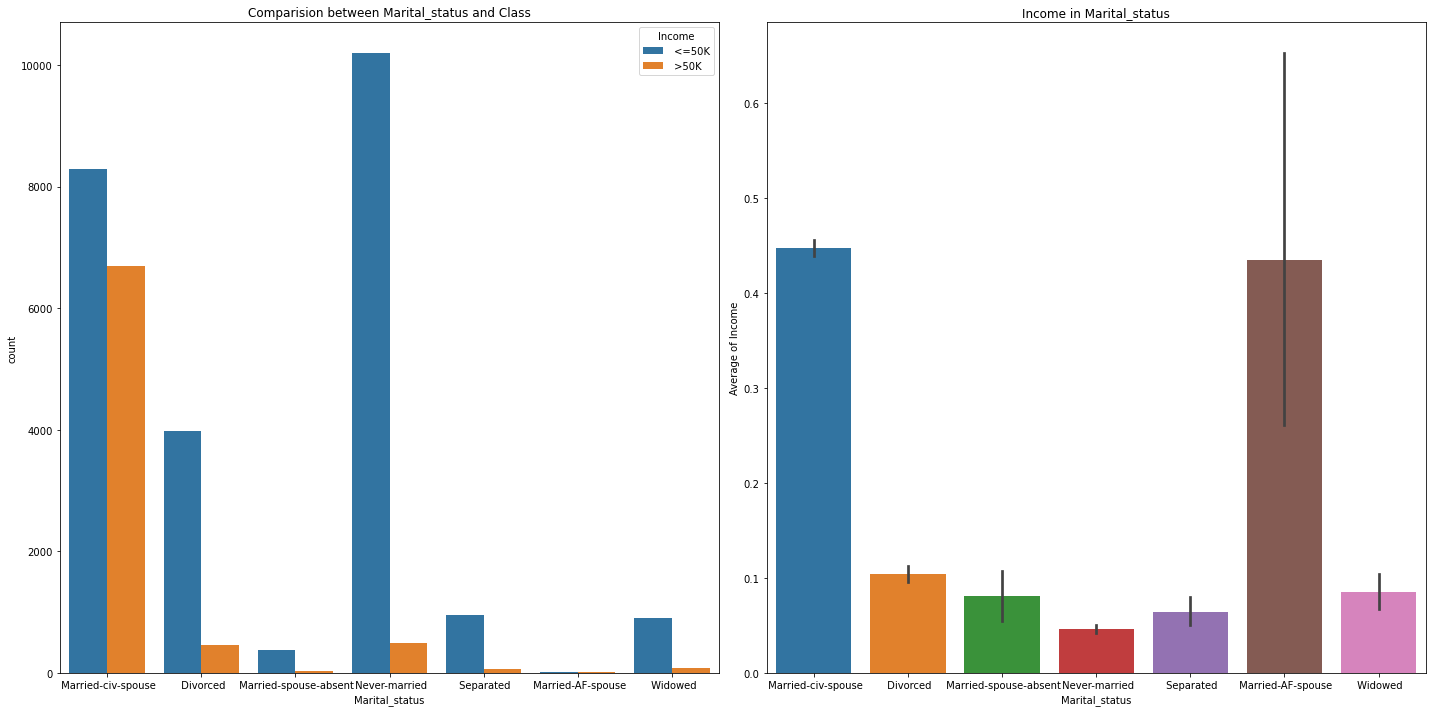

In [34]:
object_type(df1,variable='Marital_status')

When employers are not married their income is high but when comparison Marital_status with income married_af_supouse is high

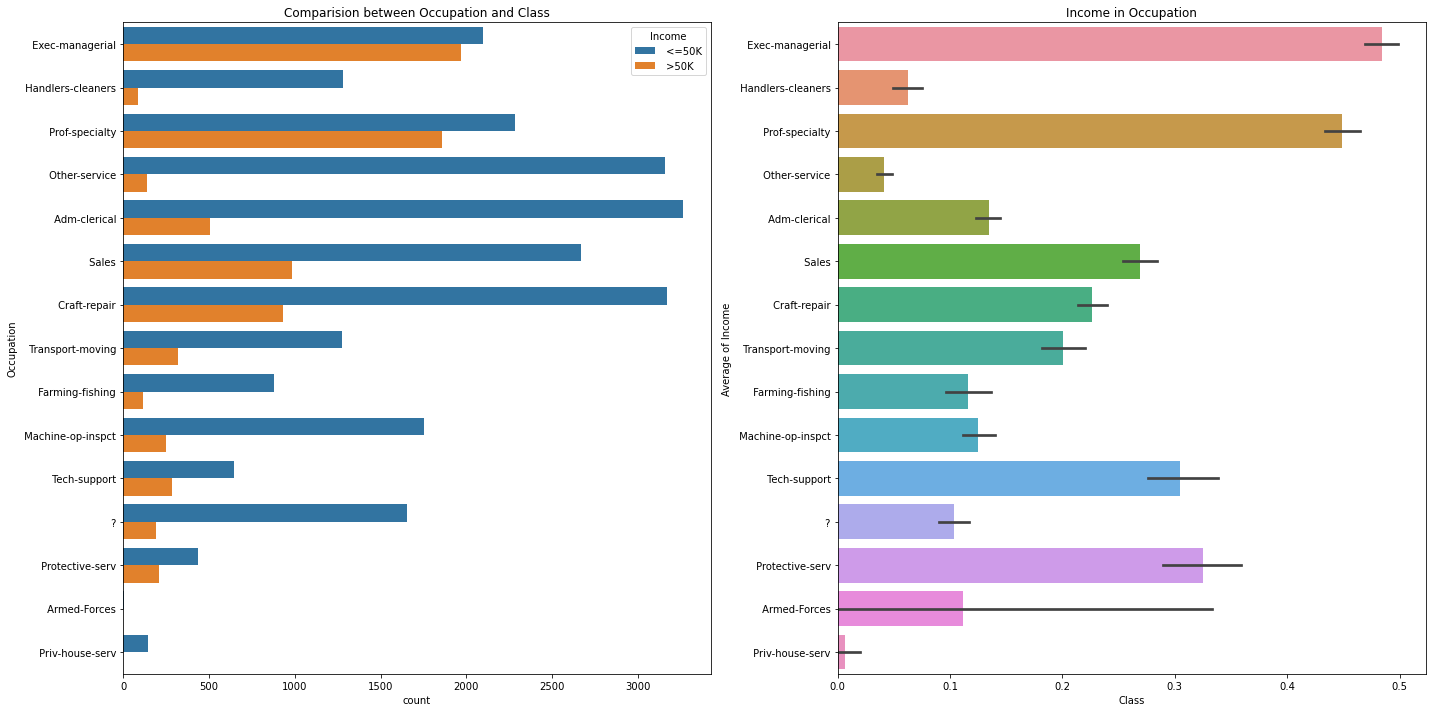

In [35]:
object_type(df1,variable='Occupation',invert_axis=True)

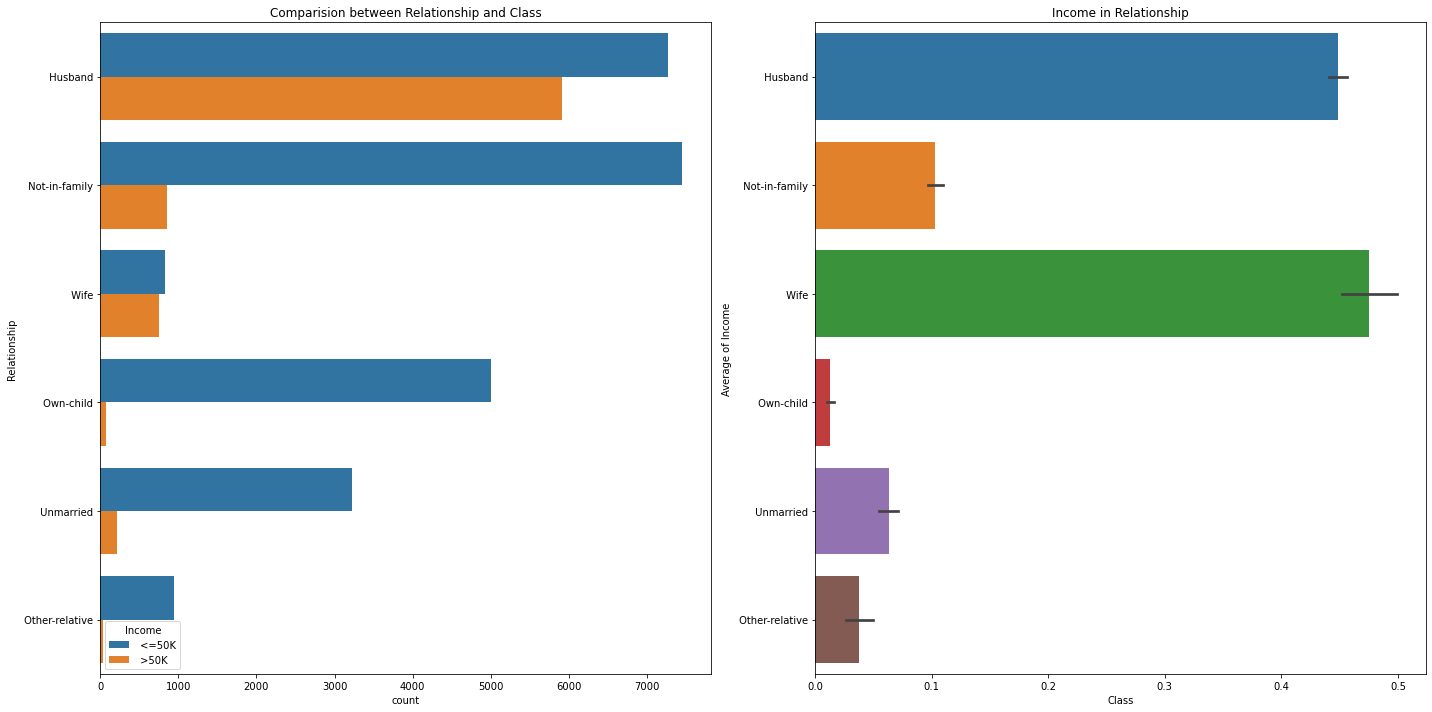

In [36]:
object_type(df1,variable='Relationship',invert_axis=True)

When employers are in not relationship then their income is high

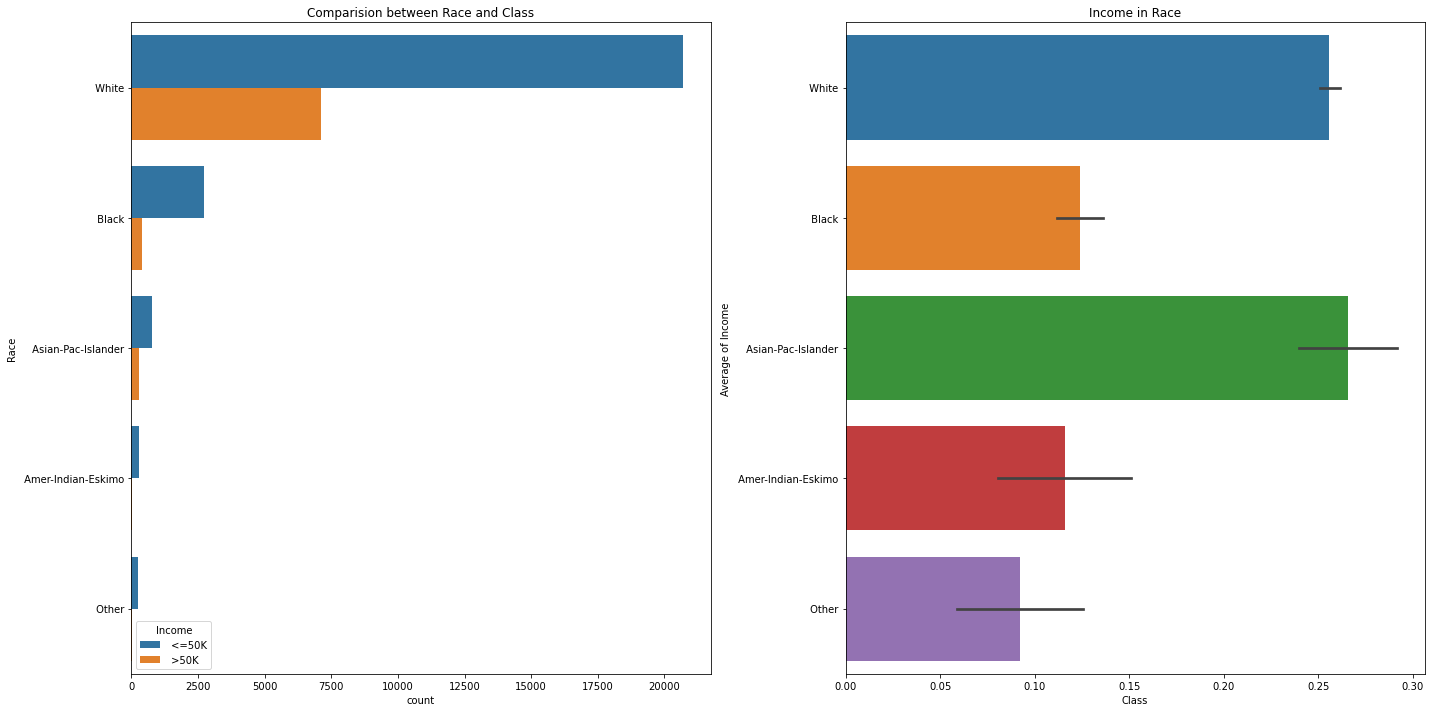

In [37]:
object_type(df1,variable='Race',invert_axis=True)

Many peoples are from usa so their employers are white race

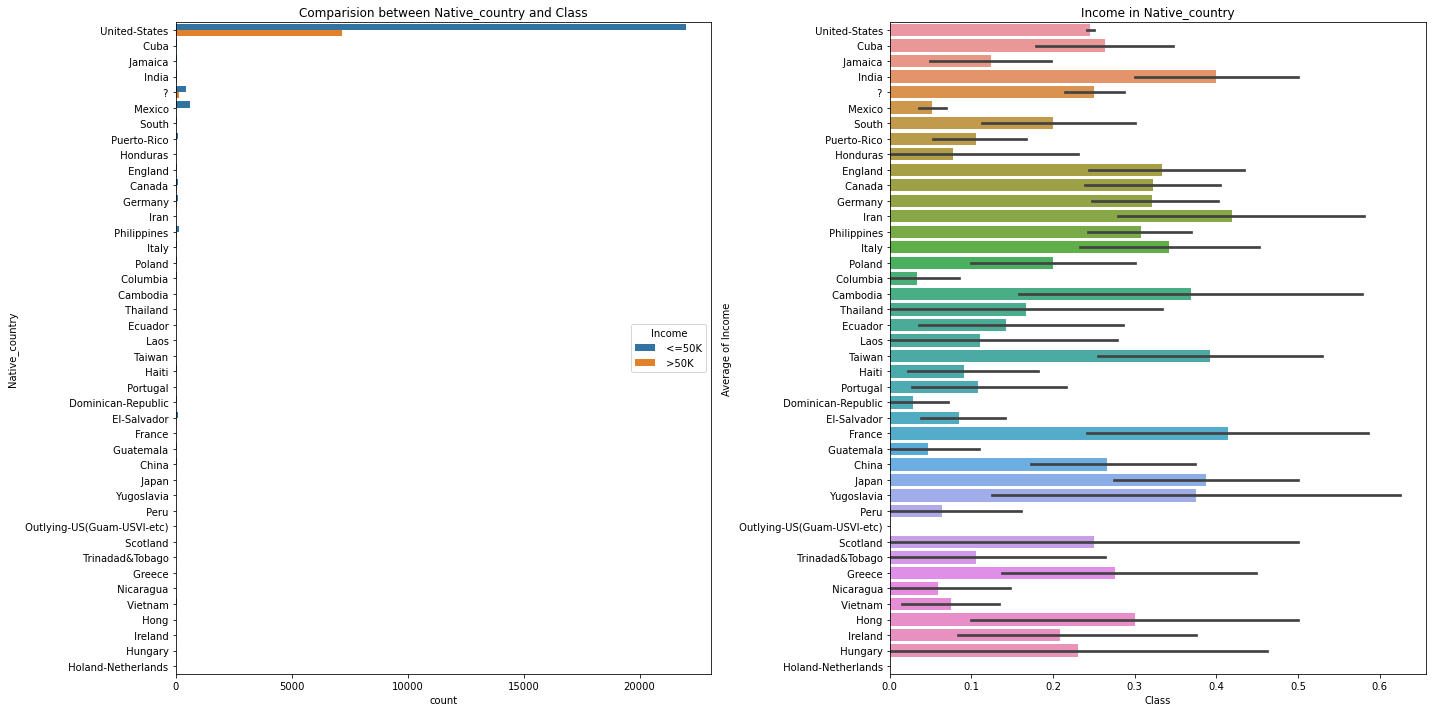

In [38]:
object_type(df1,variable='Native_country',invert_axis=True)

In the USA, more employers' income is less than 50k but Indian employers are high

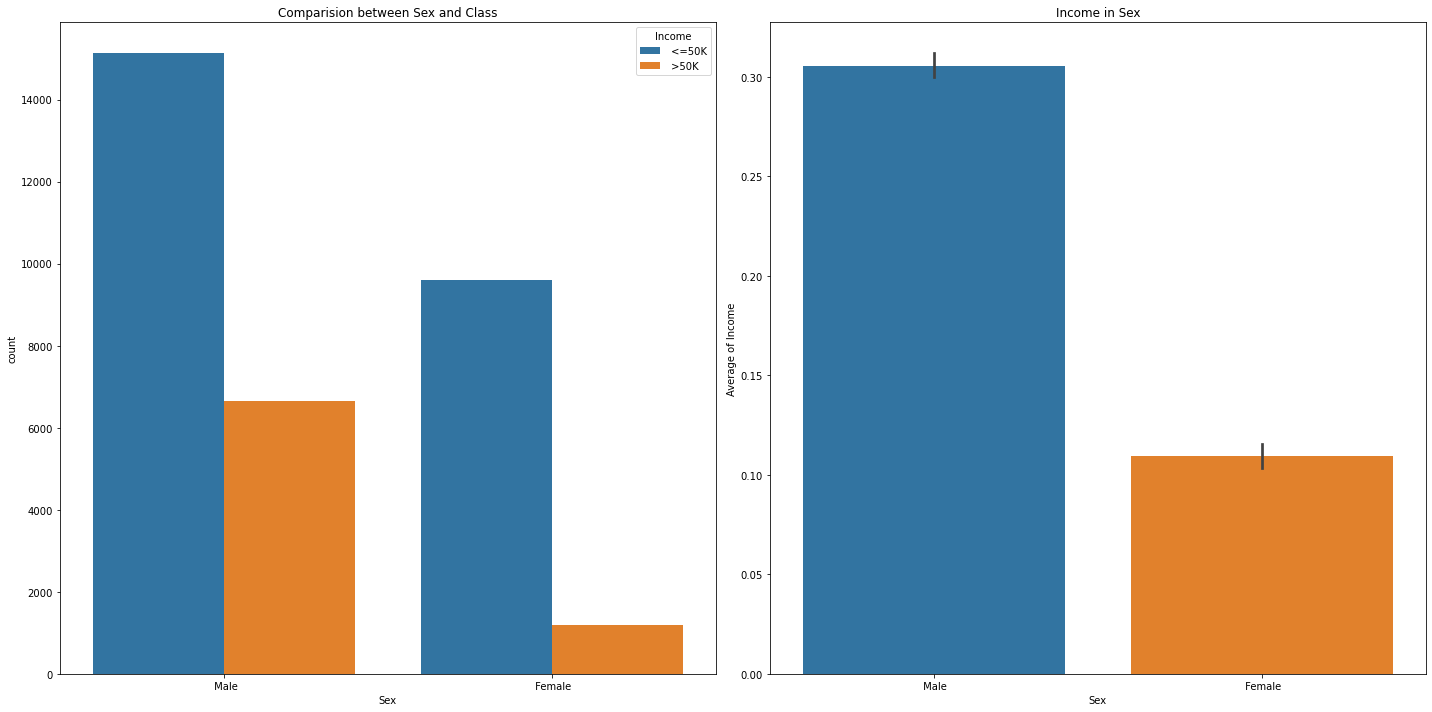

In [39]:
object_type(df1,variable='Sex')

Male sex income is low compare to female

In [40]:
df1=df1.drop(['Class'],axis=1)

# IMPUTE METHOD 

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le=LabelEncoder()

In [43]:
for i in df1.columns:
    df1[i]=le.fit_transform(df1[i].values.reshape(-1,1))

In [44]:
df1

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,6,9,2,4,0,4,1,39,0
1,4,11,0,6,1,4,1,39,0
2,4,1,2,6,0,2,1,39,0
3,4,9,2,10,5,2,0,5,0
4,4,12,2,4,5,4,0,39,0
...,...,...,...,...,...,...,...,...,...
32555,4,7,2,13,5,4,0,39,0
32556,4,11,2,7,0,4,1,39,1
32557,4,11,6,1,4,4,0,39,0
32558,4,11,4,1,3,4,1,39,0


# Make dataframe of int type dataset

In [45]:
df2=df.select_dtypes('int')
df2

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
...,...,...,...,...,...,...
32555,27,257302,12,0,0,38
32556,40,154374,9,0,0,40
32557,58,151910,9,0,0,40
32558,22,201490,9,0,0,20


In [46]:
# Check null values
df2.isnull().sum()

Age               0
Fnlwgt            0
Education_num     0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
dtype: int64

No null values are present in int dataset

In [47]:
def numeric_plot(df2,variable,target=df.Income):
    fig,ax=plt.subplots(ncols=2, figsize=(20,10))
    
    #boxplot for comparison
    sns.boxplot(x=target,y=variable,data=df2,ax=ax[0])
    ax[0].set_title(f"Comparision between {variable} and {target}")
    
    #distribution plot
    ax[1].set_title(f"Distribution of {variable}")
    ax[1].set_ylabel("Frequency")
    sns.distplot(x=df2[variable],ax=ax[1],bins=10)
    plt.show()

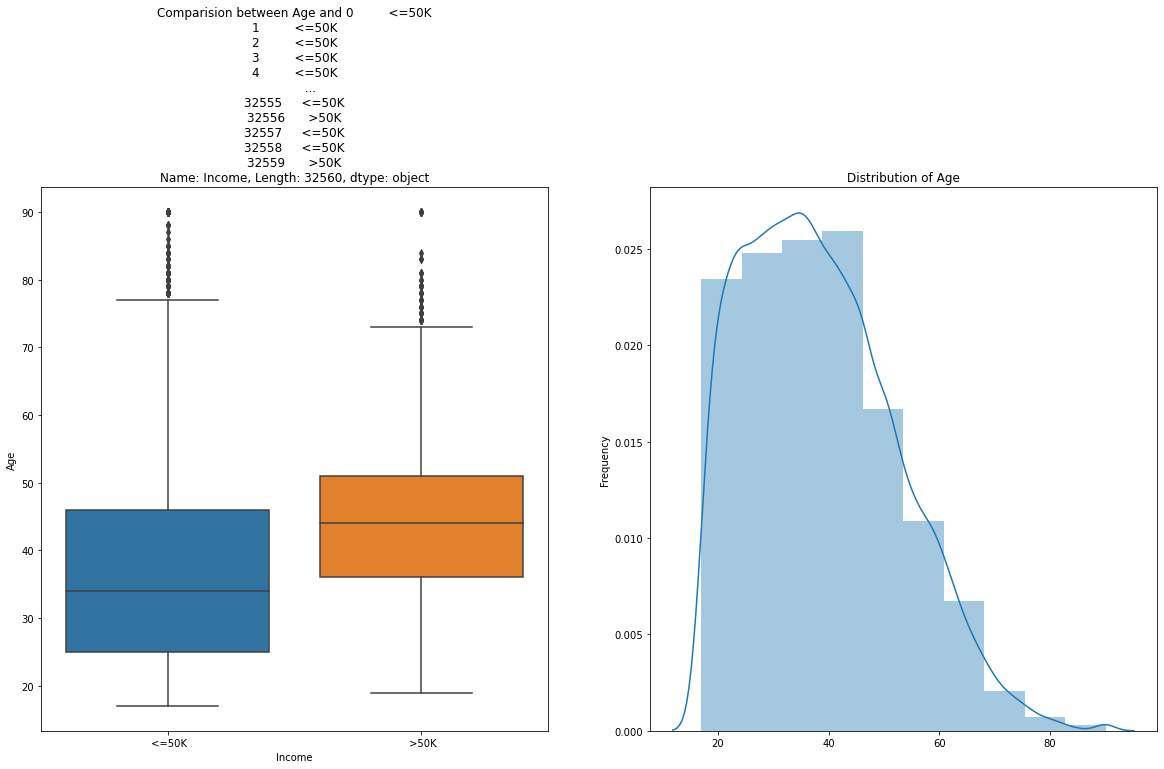

In [48]:
numeric_plot(df2,variable='Age')

1. Which employer's age is less than 45 their income is less than 50k but if their age is greater than 45 then their income is 50k+.
2. Generally people are is belong max at 40.

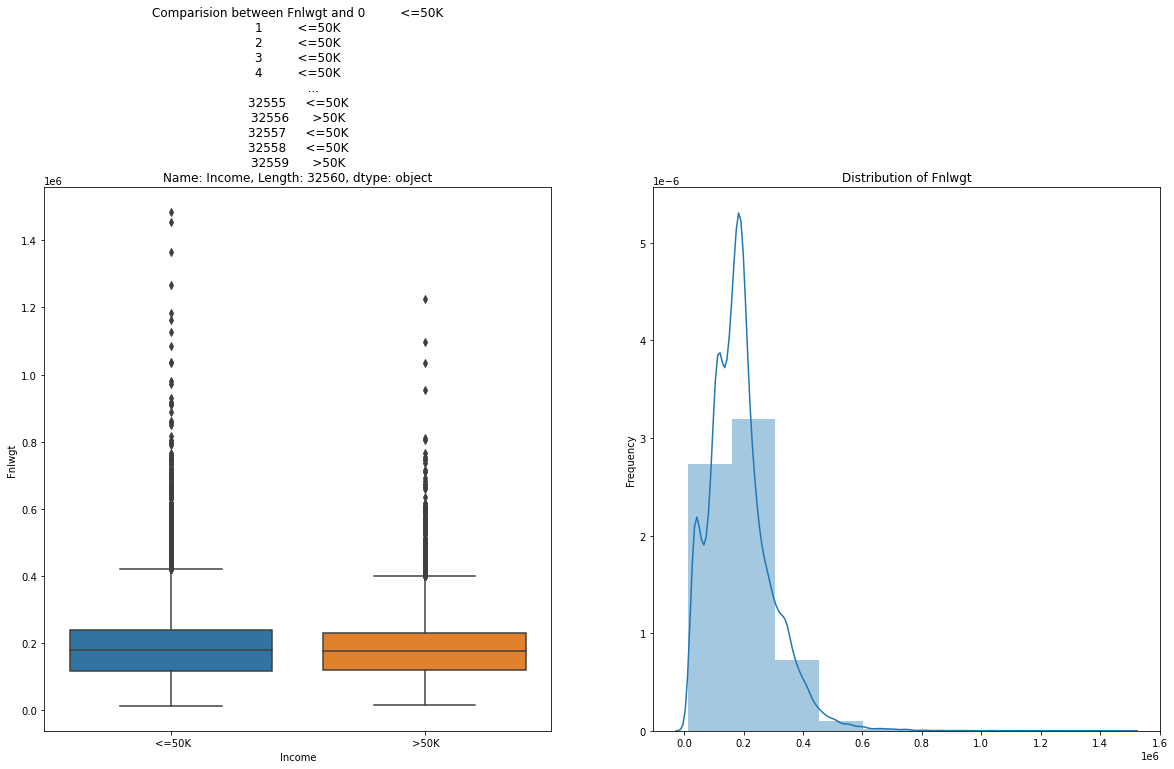

In [49]:
numeric_plot(df2,variable='Fnlwgt')

It look like insufficient variable so remove it

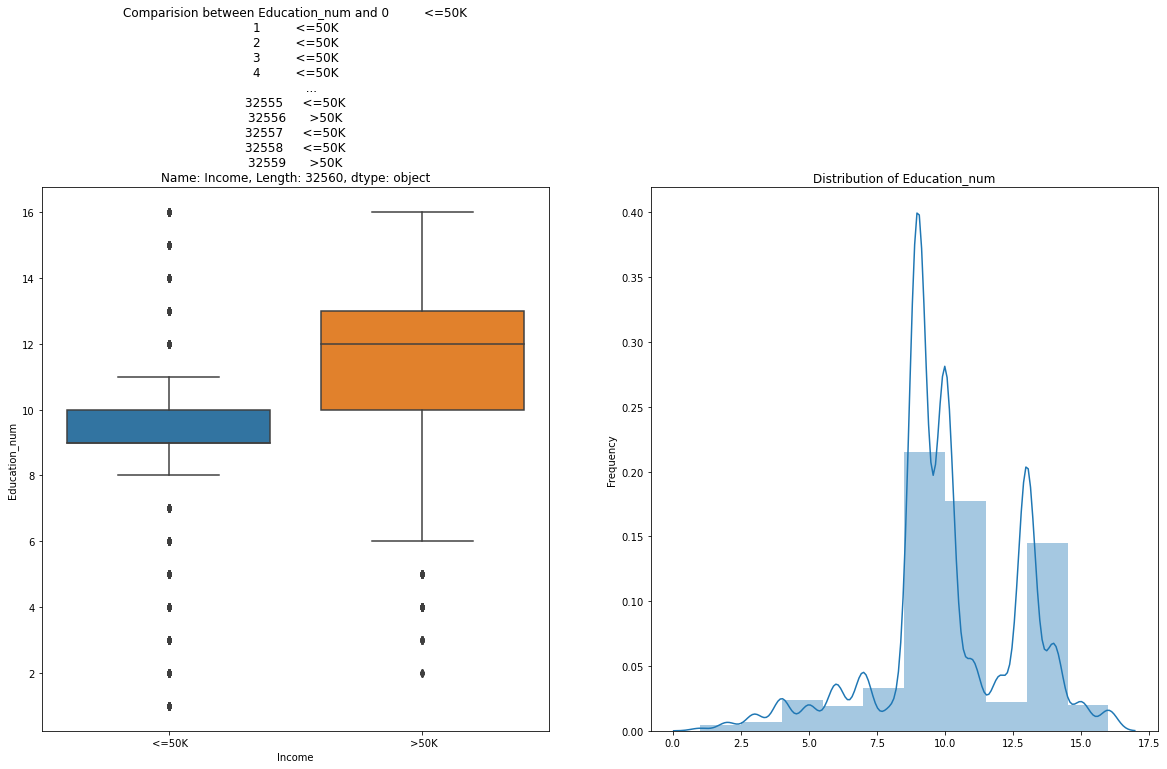

In [50]:
numeric_plot(df2,variable='Education_num')

1. If Eduction_num is less than 10 then income is less than 50k and if education_num is above then 10 then income is greater than 50k
2. Max Education_num is near 10.

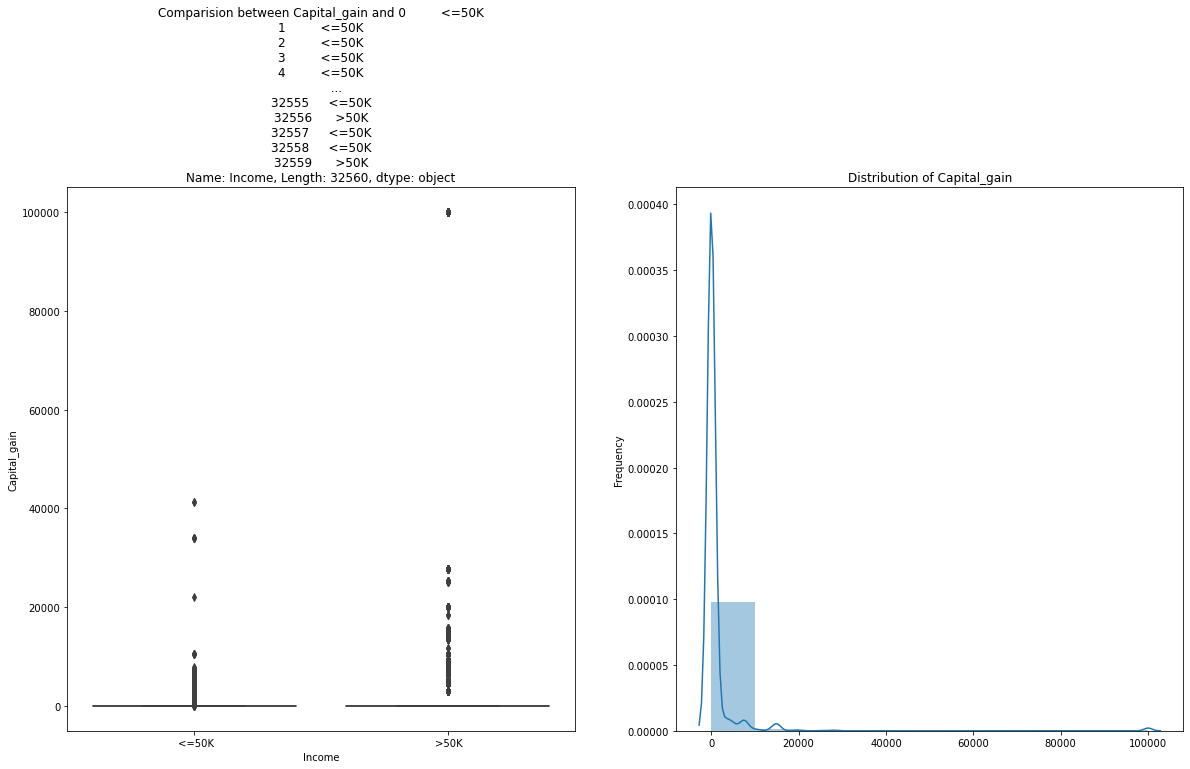

In [51]:
numeric_plot(df2,variable='Capital_gain')

It look like insufficient variable so drop it

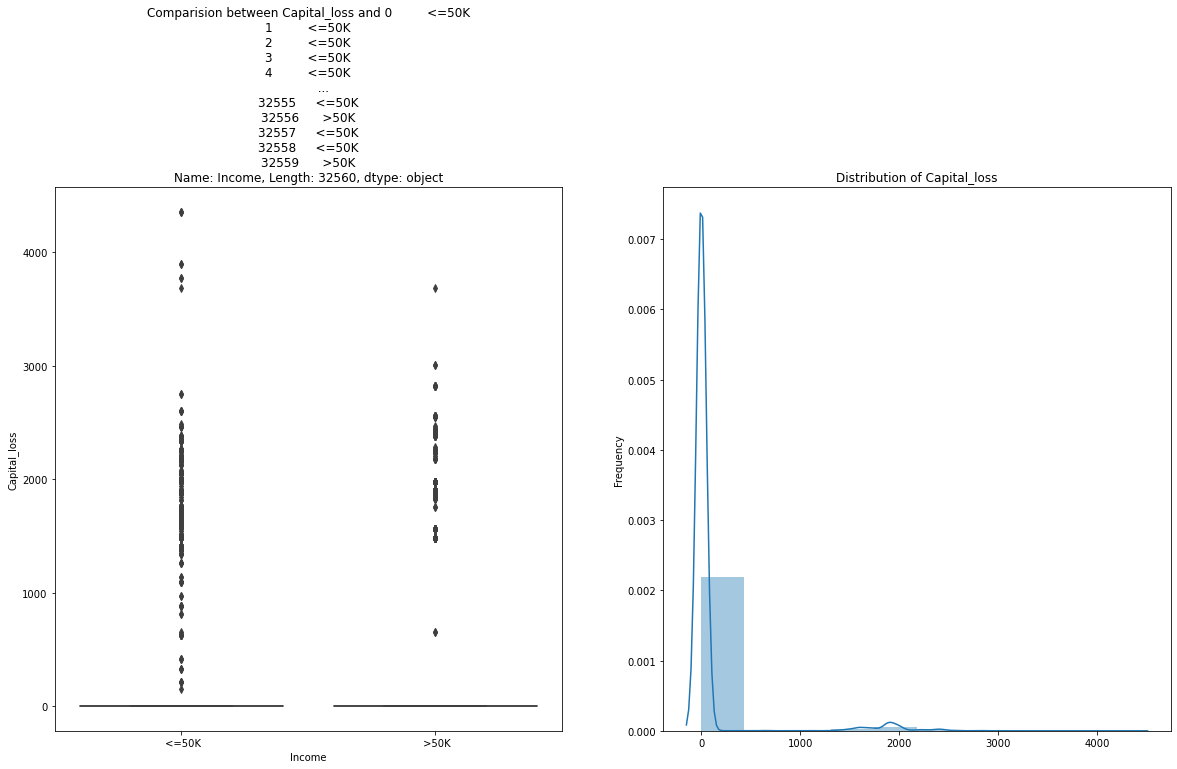

In [52]:
numeric_plot(df2,variable='Capital_loss')

It look like insufficient variable so drop it.

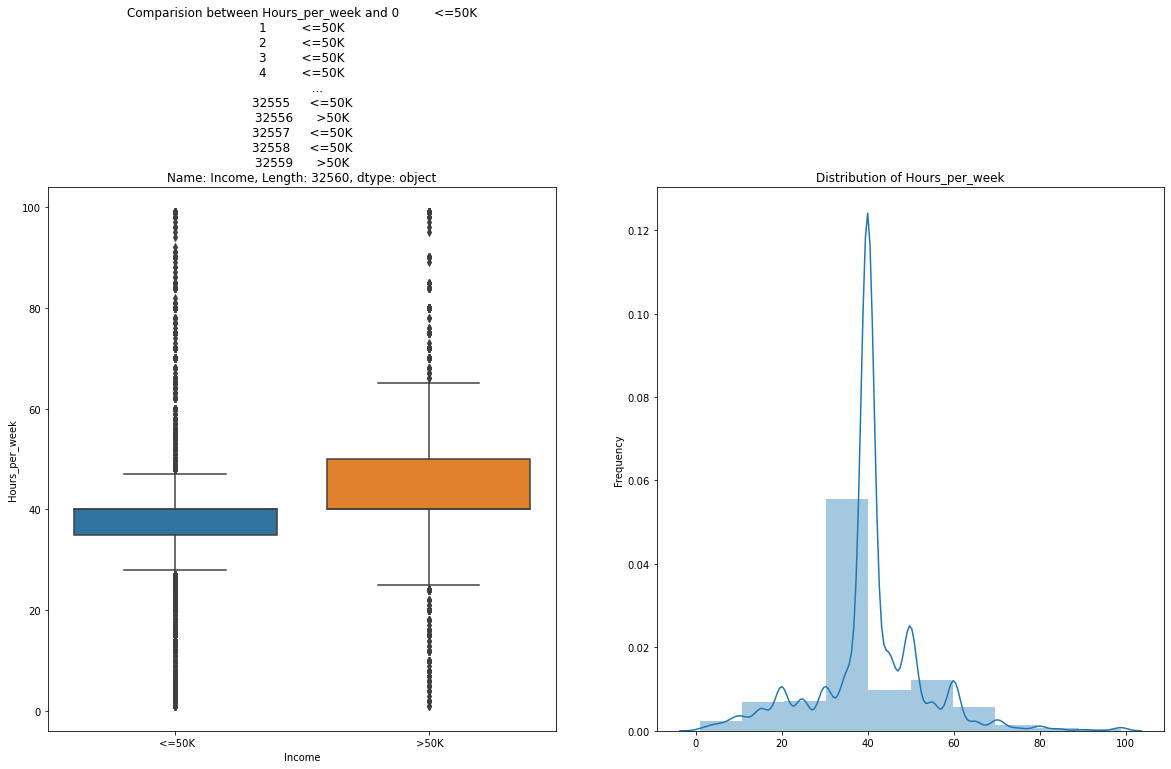

In [53]:
numeric_plot(df2,variable='Hours_per_week')

1. If employers work_per_week less than 40 hours then income is less than 50 if do work more than 40 hours then income greater than 50k
2. Max employers work in week 40 Hours

# Remove insufficient data from dataset

In [54]:
df2=df2.drop(['Capital_gain',"Capital_loss","Fnlwgt"],axis=1)

In [55]:
df2

,Age,Education_num,Hours_per_week
0,50,13,13
1,38,9,40
2,53,7,40
3,28,13,40
4,37,14,40
...,...,...,...
32555,27,12,38
32556,40,9,40
32557,58,9,40
32558,22,9,20


# Merge both dataset

In [56]:
df=pd.concat([df1,df2],axis=1)
df

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income,Age,Education_num,Hours_per_week
0,6,9,2,4,0,4,1,39,0,50,13,13
1,4,11,0,6,1,4,1,39,0,38,9,40
2,4,1,2,6,0,2,1,39,0,53,7,40
3,4,9,2,10,5,2,0,5,0,28,13,40
4,4,12,2,4,5,4,0,39,0,37,14,40
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,4,7,2,13,5,4,0,39,0,27,12,38
32556,4,11,2,7,0,4,1,39,1,40,9,40
32557,4,11,6,1,4,4,0,39,0,58,9,40
32558,4,11,4,1,3,4,1,39,0,22,9,20


# Describe Statistic

In [57]:
df.describe()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income,Age,Education_num,Hours_per_week
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,3.868796,10.298249,2.611794,6.572912,1.446376,3.665848,0.669195,36.718796,0.240817,38.581634,10.080590,40.437469
std,1.455879,3.870317,1.506225,4.228809,1.606794,0.848817,0.470510,7.823892,0.427586,13.640642,2.572709,12.347618
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,1.000000,1.000000
25%,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,39.000000,0.000000,28.000000,9.000000,40.000000
50%,4.000000,11.000000,2.000000,7.000000,1.000000,4.000000,1.000000,39.000000,0.000000,37.000000,10.000000,40.000000
75%,4.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,39.000000,0.000000,48.000000,12.000000,45.000000
max,8.000000,15.000000,6.000000,14.000000,5.000000,4.000000,1.000000,41.000000,1.000000,90.000000,16.000000,99.000000


1. Skewness is present-->
      1.Right side skew--->Workclass,Marital_status,Relationship,Sex,Age
      2.Left side skew--->Education,Occupation,Race,Native_country
2. Outluers-->Workclass,Education,Occupation,Age,hours_per_week

# Ckeck Outliers

In [58]:
col=df.columns
ncol=7
nrow=5

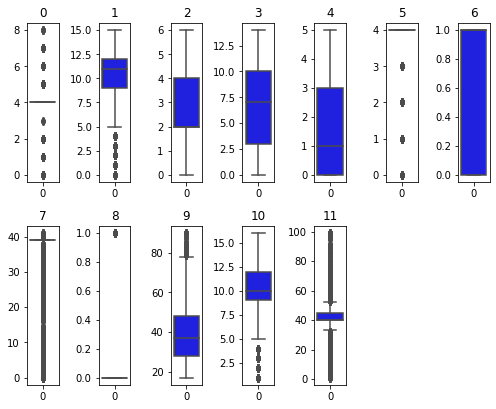

In [59]:
plt.figure(figsize=(ncol,2*ncol))
for i in range(len(col)):
    plt.subplot(nrow,ncol,i+1)
    plt.title(i)
    sns.boxplot(data=df[col[i]],color='blue',orient='v')
    plt.savefig('OUTLUER OF INCOME')
    plt.tight_layout()

Outliers are present-->Workclass,Education,Race,Native_country,Income,Class,Age,Education_num,Hours_per_week

# Ckeck Skewness

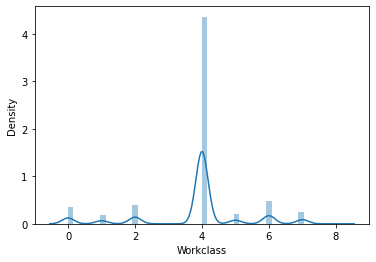

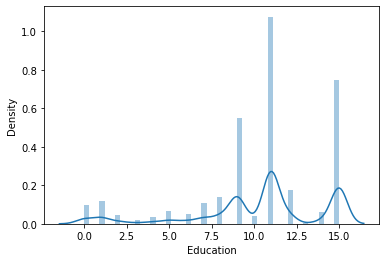

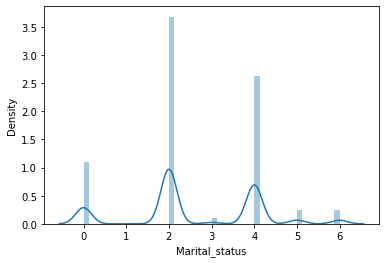

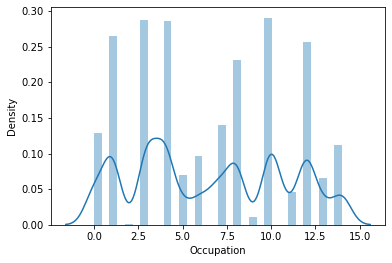

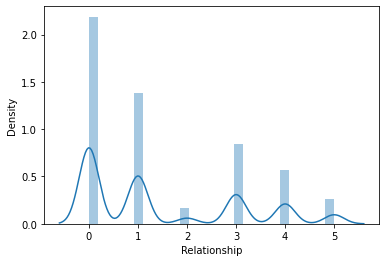

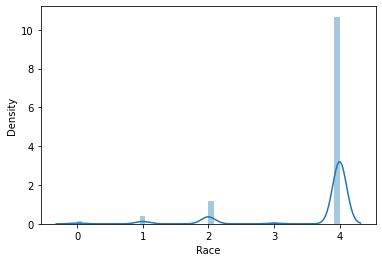

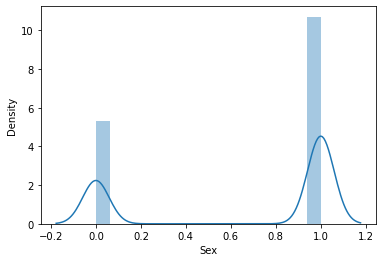

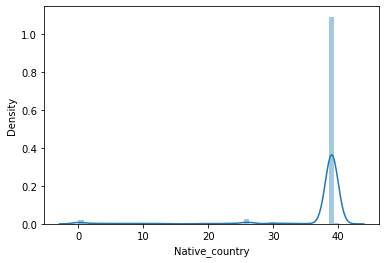

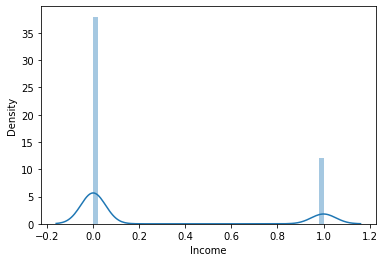

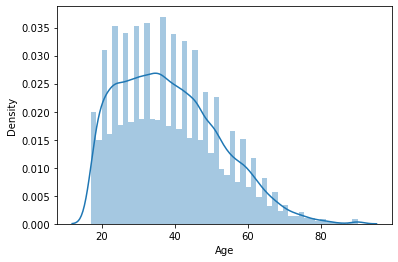

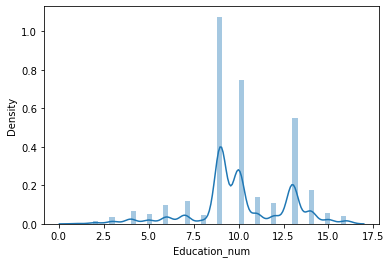

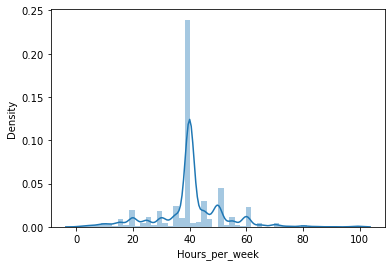

In [60]:
for i in df.columns:
    plt.subplots()
    sns.distplot(df[i])

1. Skewness in Workplace is Right side
2. Skewness in Education is Left side
3. Skewness in Marital_status is Right side
4. Skewness in Occupation is Left side
5. Skewness in Relationship is Right side
6. Skewness in Race is Left side
7. Skewness in Sex is Right-Left side
8. Skewness in Native_country is Follow normal distribution.
9. Skewness in Income is Follow noramal distribution curve.
10. Skewness in Class is Follow noramal distribution curve
11. Skewness in Age is Right side
12. Skewness in Education_num is Left side
13. Skewness in Hours_per_week is Left side

# MULTI-VARIENT PLOT

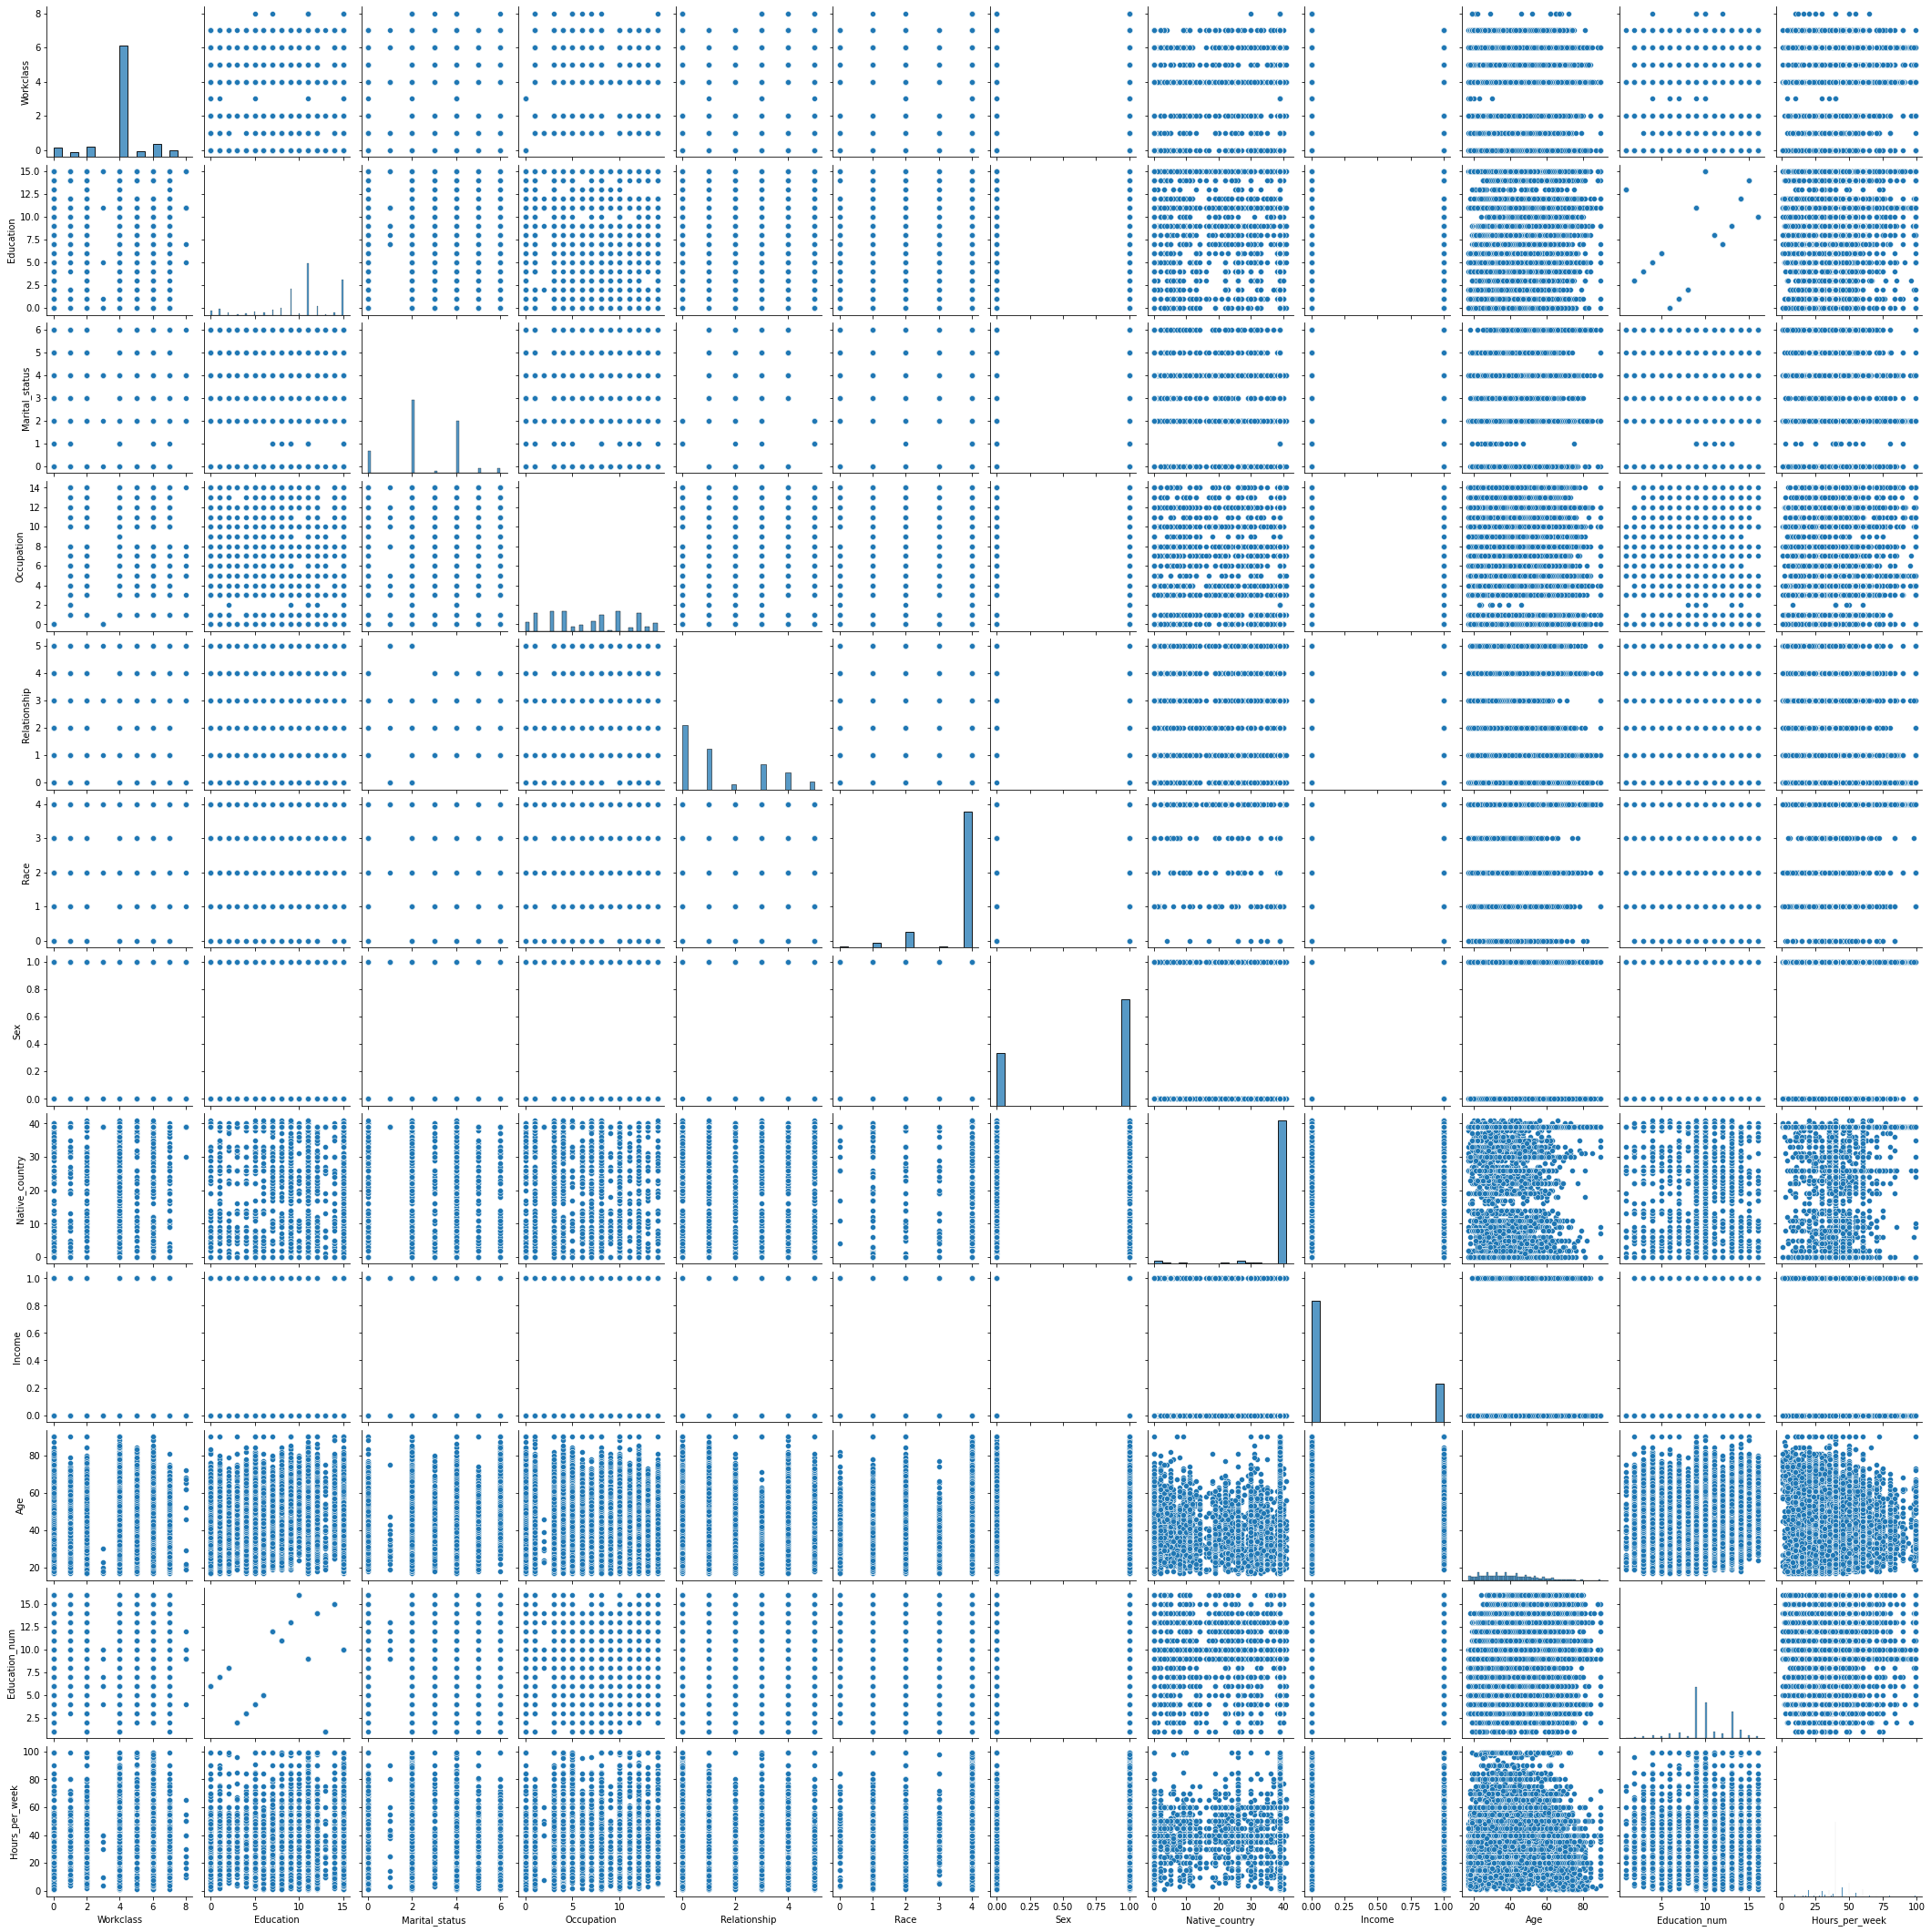

In [61]:
sns.pairplot(df)

# Check Correlation

In [62]:
df.corr()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income,Age,Education_num,Hours_per_week
Workclass,1.000000,0.023537,-0.064798,0.255004,-0.090449,0.049720,0.095942,-0.007710,0.051645,0.003786,0.052015,0.138974
Education,0.023537,1.000000,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.064291,0.079311,-0.010508,0.359172,0.055510
Marital_status,-0.064798,-0.038398,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.023827,-0.199295,-0.266292,-0.069338,-0.190521
Occupation,0.255004,-0.021274,-0.009617,1.000000,-0.075620,0.006779,0.080328,-0.012532,0.075448,-0.020946,0.109748,0.080384
Relationship,-0.090449,-0.010879,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.005504,-0.250924,-0.263698,-0.094145,-0.248975
Race,0.049720,0.014135,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.137849,0.071853,0.028718,0.031825,0.041910
Sex,0.095942,-0.027349,-0.129337,0.080328,-0.582453,0.087197,1.000000,-0.008125,0.215995,0.088832,0.012256,0.229312
Native_country,-0.007710,0.064291,-0.023827,-0.012532,-0.005504,0.137849,-0.008125,1.000000,0.015845,-0.001151,0.050831,-0.002671
Income,0.051645,0.079311,-0.199295,0.075448,-0.250924,0.071853,0.215995,0.015845,1.000000,0.234039,0.335182,0.229690
Age,0.003786,-0.010508,-0.266292,-0.020946,-0.263698,0.028718,0.088832,-0.001151,0.234039,1.000000,0.036527,0.068756


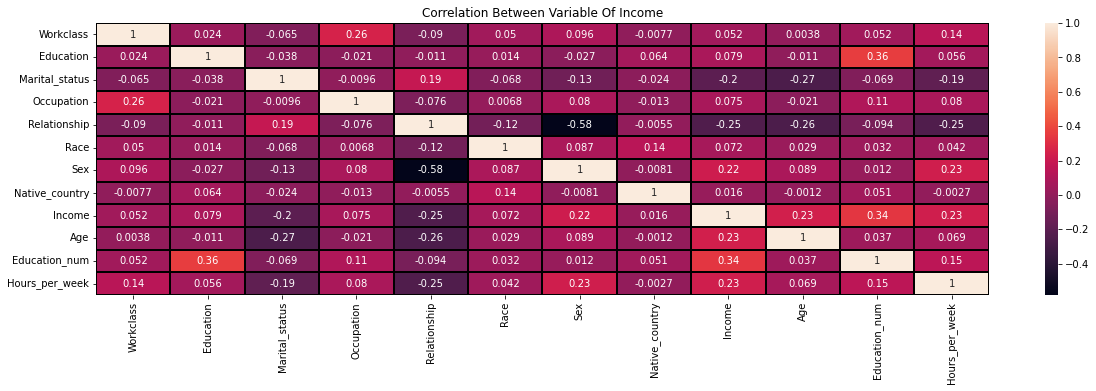

In [63]:
plt.figure(figsize=(20,5))
sns.heatmap(df.corr(),linewidth=2,linecolor='black',annot=True)
plt.title('Correlation Between Variable Of Income')
plt.savefig('Correlation Income')
plt.show()

# Check correlation between variable ---->
1. Work_class is correlated with target Income is 5.2%. It is a good bond with Target.
2. Education is correlated with target Income is 7.9%. It is a good bond with Target.
3. Marital status is correlated with target Income is -20%. It is a very good bond with Target.
4. Occupation is correlated with target Income is 7.5%. It is a good bond with Target.
5. Relationship is correlated with target Income is -25%. It is a very good bond with Target.
6. Race  is correlated with target Income is 7.2%. It is a good bond with Target.
7. Sex  is correlated with target Income is 22%. It is a very good bond with Target.
8. Native_country is correlated with target Income is 1.6%. It is a very week bond with Target.
9. Age is correlated with target Income is 23%. It is a very good bond with Target.
10. Education_num is correlated with target Income is 34%. It is a  strong bond with Target.
11. Hours_per_week is correlated with target Income is 23%. It is a very good bond with Target.

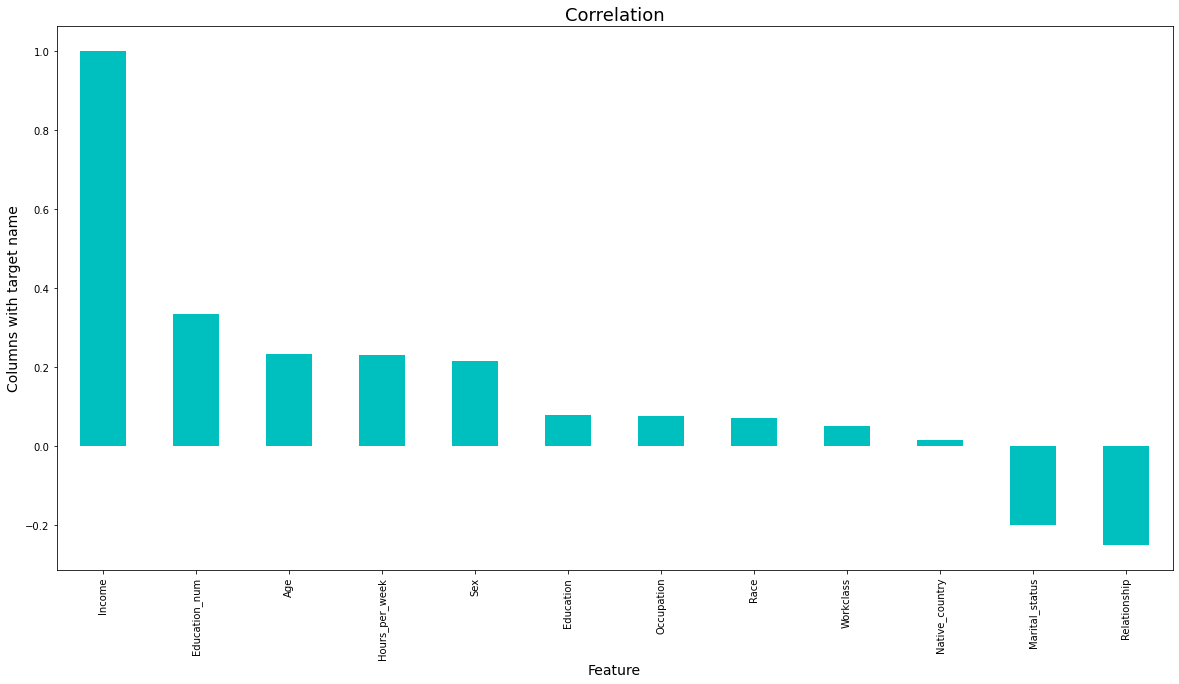

In [64]:
plt.figure(figsize=(20,10))
df.corr()['Income'].sort_values(ascending=False).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Only two variables MARITAL_STATUS AND RELATIONSHIP are in negative direction correlation

# Check outliers

In [65]:
# zscore laibary
from scipy.stats import zscore

In [66]:
(np.abs(zscore(df))<3).all().all() #check null values in whole dataset

False

Outliers are present in our daatset

In [67]:
# check outliuers in every columns
(np.abs(zscore(df))<3).all()

Workclass          True
Education          True
Marital_status     True
Occupation         True
Relationship       True
Race              False
Sex                True
Native_country    False
Income             True
Age               False
Education_num     False
Hours_per_week    False
dtype: bool

# Outliers are present-->
1. Race------>             False
2. Native_country------>    False
3. Age---->               False
4. Education_num---->     False
5. Hours_per_week---->    False

# We remove outliers from int and float-type datasets bcoz no method removes outliers from categorical data and object-type data

In [68]:
df2  #int type dtype

,Age,Education_num,Hours_per_week
0,50,13,13
1,38,9,40
2,53,7,40
3,28,13,40
4,37,14,40
...,...,...,...
32555,27,12,38
32556,40,9,40
32557,58,9,40
32558,22,9,20


In [69]:
(np.abs(zscore(df2))<3).all()  #check outliers in int type dtype

Age               False
Education_num     False
Hours_per_week    False
dtype: bool

# In df2 daatset outliers are present in Age,Education_num,Hours_per_week

# IQR METHOD

In [70]:
q1=df2.quantile(0.25)
q1

Age               28.0
Education_num      9.0
Hours_per_week    40.0
Name: 0.25, dtype: float64

In [71]:
q2=df2.quantile(0.75)
q2

Age               48.0
Education_num     12.0
Hours_per_week    45.0
Name: 0.75, dtype: float64

In [72]:
iqr=q2-q1
iqr

Age               20.0
Education_num      3.0
Hours_per_week     5.0
dtype: float64

In [73]:
upper=q2+(1.5*iqr)
lower=q1-(1.5*iqr)

In [74]:
df3=df2[(df2>lower) & (df2<upper)]
df3

,Age,Education_num,Hours_per_week
0,50.0,13.0,NaN
1,38.0,9.0,40.0
2,53.0,7.0,40.0
3,28.0,13.0,40.0
4,37.0,14.0,40.0
...,...,...,...
32555,27.0,12.0,38.0
32556,40.0,9.0,40.0
32557,58.0,9.0,40.0
32558,22.0,9.0,NaN


# Check null values after apply IQR METHOD

In [75]:
df3.isnull().sum()

Age                166
Education_num     1198
Hours_per_week    9008
dtype: int64

Outliers are present in dataset so remove null values

In [76]:
# import impute method
from sklearn.impute import SimpleImputer

In [77]:
imp=SimpleImputer(strategy='mean')

In [78]:
for i in df3.columns:
    df3[i]=imp.fit_transform(df3[i].values.reshape(-1,1))

In [79]:
df3.isnull().sum()

Age               0
Education_num     0
Hours_per_week    0
dtype: int64

No null values are present in dataset 

# Check Skew in dataset

In [80]:
df3.skew()

Age               0.460734
Education_num     0.273042
Hours_per_week    1.206285
dtype: float64

Take threshold values for skew is +/-0.4 then skewness is present-->>
1. Age---->              0.460734
2. Hours_per_week----->   1.206285

# BOXCOX METHOD-->POWER METHOD REMOVING SKEWNESS

In [81]:
from sklearn.preprocessing import power_transform

In [82]:
x=power_transform(df3,method='box-cox')

In [83]:
df4=pd.DataFrame(x,columns=df3.columns)

In [84]:
df4.skew()

Age              -0.023014
Education_num     0.008721
Hours_per_week   -0.107233
dtype: float64

Skewness is remove and comes under in range +/-0.5

# MERGE BOTH DATASET

In [85]:
df=pd.concat([df1,df4],axis=1)
df

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income,Age,Education_num,Hours_per_week
0,6,9,2,4,0,4,1,39,0,0.916606,1.192728,0.152737
1,4,11,0,6,1,4,1,39,0,0.106454,-0.580467,-0.382620
2,4,1,2,6,0,2,1,39,0,1.095439,-1.585257,-0.382620
3,4,9,2,10,5,2,0,5,0,-0.735778,1.192728,-0.382620
4,4,12,2,4,5,4,0,39,0,0.030474,1.600101,-0.382620
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,4,7,2,13,5,4,0,39,0,-0.832115,0.772670,-1.193498
32556,4,11,2,7,0,4,1,39,1,0.253936,-0.580467,-0.382620
32557,4,11,6,1,4,4,0,39,0,1.376986,-0.580467,-0.382620
32558,4,11,4,1,3,4,1,39,0,-1.359521,-0.580467,0.152737


# Split Data Into Dependent And Independent 

In [86]:
x=df.drop(['Income'],axis=1)

In [87]:
y=df.Income

In [88]:
x.shape

(32560, 11)

In [89]:
y.shape

(32560,)

In [90]:
y=pd.DataFrame(y)
y.shape

(32560, 1)

# APPLY STANDARD SCALER METHOD

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
st=StandardScaler()

In [93]:
x=st.fit_transform(x)

# Apply diffrent method for finding best model

# TRAIN TEST SPLIT METHOD

In [94]:
LO=LogisticRegression()
DT=DecisionTreeClassifier()
SV=SVC()
KN=KNeighborsClassifier()
AD=AdaBoostClassifier()
GR=GradientBoostingClassifier()
RF=RandomForestClassifier()

# MODEL-->LOGISTIC REGRESSION

In [95]:
max_acc=0
max_rand=0
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    LO.fit(x_train,y_train)
    pred=LO.predict(x_test)
    accuracy=accuracy_score(y_test,pred)*100
    print(f"At random_state {i} model give accuracy--> {accuracy}")
    if accuracy>max_acc:
        max_acc=accuracy
        max_rand=i
        print(f"Max Accuracy {max_acc} at random_state {max_rand}")
        print('\n')

At random_state 0 model give accuracy--> 80.42076167076168
Max Accuracy 80.42076167076168 at random_state 0


At random_state 1 model give accuracy--> 80.8507371007371
Max Accuracy 80.8507371007371 at random_state 1


At random_state 2 model give accuracy--> 80.03685503685503
At random_state 3 model give accuracy--> 80.31326781326781
At random_state 4 model give accuracy--> 80.20577395577395
At random_state 5 model give accuracy--> 81.08108108108108
Max Accuracy 81.08108108108108 at random_state 5


At random_state 6 model give accuracy--> 79.6529484029484
At random_state 7 model give accuracy--> 79.92936117936118
At random_state 8 model give accuracy--> 80.7585995085995
At random_state 9 model give accuracy--> 80.42076167076168
At random_state 10 model give accuracy--> 80.46683046683046
At random_state 11 model give accuracy--> 80.55896805896806
At random_state 12 model give accuracy--> 79.34582309582309
At random_state 13 model give accuracy--> 79.97542997542998
At random_state 14 mo

At random state 18 model give accuracy score 81.17%

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=18)
LO.fit(x_train,y_train)
pred_test=LO.predict(x_test)
print(f"Confusion Matrix : {confusion_matrix(y_test,pred_test)}")
print(f"Classification Report : {classification_report(y_test,pred_test)}")
print(f"Accuracy Score  : {(accuracy_score(y_test,pred_test)*100)}")
print(f"Dataset Score : {(LO.score(x_train,y_train))*100}")

Confusion Matrix : [[4678  301]
 [ 925  608]]
Classification Report :               precision    recall  f1-score   support

           0       0.83      0.94      0.88      4979
           1       0.67      0.40      0.50      1533

    accuracy                           0.81      6512
   macro avg       0.75      0.67      0.69      6512
weighted avg       0.80      0.81      0.79      6512

Accuracy Score  : 81.17321867321867
Dataset Score : 79.9831081081081


1. Most Precision score from >50K-->67%
2. Most Precision score from <50K-->83%
3. Avg of total dataset-->75%
4. Accuracy score-->81.17%
5. Train_score-->79.98%

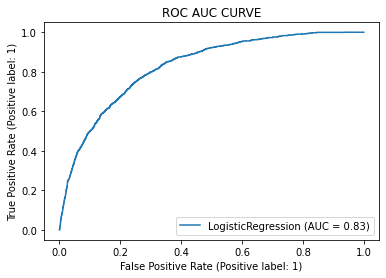

In [97]:
plot_roc_curve(LO,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show()

Model give AUC score is 83%

# MODEL-->DECISION TREE CLASSIFIER

In [98]:
max_acc=0
max_rand=0
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    DT.fit(x_train,y_train)
    pred=DT.predict(x_test)
    accuracy=accuracy_score(y_test,pred)*100
    print(f"At random_state {i} model give accuracy--> {accuracy}")
    if accuracy>max_acc:
        max_acc=accuracy
        max_rand=i
        print(f"Max Accuracy {max_acc} at random_state {max_rand}")
        print('\n')

At random_state 0 model give accuracy--> 78.04054054054053
Max Accuracy 78.04054054054053 at random_state 0


At random_state 1 model give accuracy--> 78.83906633906635
Max Accuracy 78.83906633906635 at random_state 1


At random_state 2 model give accuracy--> 78.51658476658476
At random_state 3 model give accuracy--> 78.07125307125307
At random_state 4 model give accuracy--> 78.82371007371007
At random_state 5 model give accuracy--> 78.22481572481573
At random_state 6 model give accuracy--> 77.54914004914005
At random_state 7 model give accuracy--> 77.54914004914005
At random_state 8 model give accuracy--> 78.992628992629
Max Accuracy 78.992628992629 at random_state 8


At random_state 9 model give accuracy--> 78.22481572481573
At random_state 10 model give accuracy--> 78.30159705159704
At random_state 11 model give accuracy--> 77.62592137592138
At random_state 12 model give accuracy--> 77.18058968058969
At random_state 13 model give accuracy--> 77.19594594594594
At random_state 14 mo

At random state 8 models give an accuracy score of 78.99%

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=8)
DT.fit(x_train,y_train)
pred=DT.predict(x_test)
print(f"Confusion_Matrix= {confusion_matrix(y_test,pred)}")
print(f"Classification_Report= {classification_report(y_test,pred)}")
print(f"Accuracy_Score= {accuracy_score(y_test,pred)*100}")
print(f"Dataset_Score={DT.score(x_train,y_train)*100}")

Confusion_Matrix= [[4313  647]
 [ 721  831]]
Classification_Report=               precision    recall  f1-score   support

           0       0.86      0.87      0.86      4960
           1       0.56      0.54      0.55      1552

    accuracy                           0.79      6512
   macro avg       0.71      0.70      0.71      6512
weighted avg       0.79      0.79      0.79      6512

Accuracy_Score= 78.992628992629
Dataset_Score=96.60626535626535


1. Most Precision score from >50K-->56%
2. Most Precision scores from <50K-->86%
3. Avg of total dataset-->71%
4. Accuracy score-->78.99%
5. Train_score-->96.60%

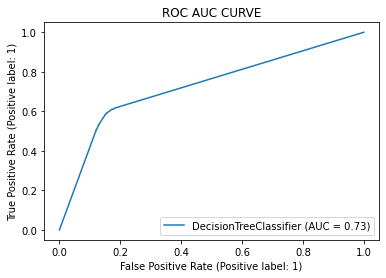

In [101]:
plot_roc_curve(DT,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show()

Model give AUC SCORE 73%

# MODEL-->SUPPORT VECTOR CLASIIFIER1

In [103]:
max_acc=0
max_rand=0
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    SV.fit(x_train,y_train)
    pred=SV.predict(x_test)
    accuracy=accuracy_score(y_test,pred)*100
    print(f"At random_state {i} model give accuracy--> {accuracy}")
    if accuracy>max_acc:
        max_acc=accuracy
        max_rand=i
        print(f"Max Accuracy {max_acc} at random_state {max_rand}")
        print('\n')

At random_state 0 model give accuracy--> 82.30958230958231
Max Accuracy 82.30958230958231 at random_state 0


At random_state 1 model give accuracy--> 82.41707616707616
Max Accuracy 82.41707616707616 at random_state 1


At random_state 2 model give accuracy--> 82.92383292383292
Max Accuracy 82.92383292383292 at random_state 2


At random_state 3 model give accuracy--> 82.21744471744472
At random_state 4 model give accuracy--> 82.17137592137593
At random_state 5 model give accuracy--> 82.8470515970516
At random_state 6 model give accuracy--> 81.94103194103194
At random_state 7 model give accuracy--> 82.34029484029483
At random_state 8 model give accuracy--> 82.5859950859951
At random_state 9 model give accuracy--> 82.24815724815726
At random_state 10 model give accuracy--> 82.73955773955774
At random_state 11 model give accuracy--> 83.18488943488943
Max Accuracy 83.18488943488943 at random_state 11


At random_state 12 model give accuracy--> 81.35749385749385
At random_state 13 model gi

At random state 11 models give an accuracy score of 83.18%

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=11)
SV.fit(x_train,y_train)
pred=SV.predict(x_test)
print(f"Confusion_Matrix= {confusion_matrix(y_test,pred)}")
print(f"Classification_Report= {classification_report(y_test,pred)}")
print(f"Accuracy_Score= {accuracy_score(y_test,pred)*100}")
print(f"Dataset_Score={SV.score(x_train,y_train)*100}")

Confusion_Matrix= [[4673  260]
 [ 835  744]]
Classification_Report=               precision    recall  f1-score   support

           0       0.85      0.95      0.90      4933
           1       0.74      0.47      0.58      1579

    accuracy                           0.83      6512
   macro avg       0.79      0.71      0.74      6512
weighted avg       0.82      0.83      0.82      6512

Accuracy_Score= 83.18488943488943
Dataset_Score=82.74723587223588


1. Most Precision score from >50K-->74%
2. Most Precision scores from <50K-->85%
3. Avg of total dataset-->79%
4. Accuracy score-->83.18%
5. Train_score-->82.74%

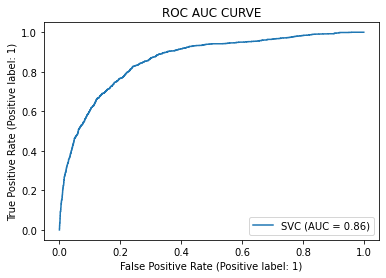

In [105]:
plot_roc_curve(SV,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show()

Model give AUC SCORE 86%

# MODEL-->KNEIGHBORS CLASSIFIER

In [106]:
max_acc=0
max_rand=0
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    KN.fit(x_train,y_train)
    pred=KN.predict(x_test)
    accuracy=accuracy_score(y_test,pred)*100
    print(f"At random_state {i} model give accuracy--> {accuracy}")
    if accuracy>max_acc:
        max_acc=accuracy
        max_rand=i
        print(f"Max Accuracy {max_acc} at random_state {max_rand}")
        print('\n')

At random_state 0 model give accuracy--> 82.10995085995087
Max Accuracy 82.10995085995087 at random_state 0


At random_state 1 model give accuracy--> 81.83353808353809
At random_state 2 model give accuracy--> 81.51105651105651
At random_state 3 model give accuracy--> 81.31142506142506
At random_state 4 model give accuracy--> 81.51105651105651
At random_state 5 model give accuracy--> 81.9103194103194
At random_state 6 model give accuracy--> 80.86609336609337
At random_state 7 model give accuracy--> 81.67997542997543
At random_state 8 model give accuracy--> 81.63390663390663
At random_state 9 model give accuracy--> 80.91216216216216
At random_state 10 model give accuracy--> 81.52641277641277
At random_state 11 model give accuracy--> 81.55712530712532
At random_state 12 model give accuracy--> 80.71253071253072
At random_state 13 model give accuracy--> 81.08108108108108
At random_state 14 model give accuracy--> 81.6492628992629
At random_state 15 model give accuracy--> 81.97174447174447
A

At random state 45 models give an accuracy score of 82.67%

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45)
KN.fit(x_train,y_train)
pred=KN.predict(x_test)
print(f"Confusion_Matrix= {confusion_matrix(y_test,pred)}")
print(f"Classification_Report= {classification_report(y_test,pred)}")
print(f"Accuracy_Score= {accuracy_score(y_test,pred)*100}")
print(f"Dataset_Score={KN.score(x_train,y_train)*100}")

Confusion_Matrix= [[4462  497]
 [ 631  922]]
Classification_Report=               precision    recall  f1-score   support

           0       0.88      0.90      0.89      4959
           1       0.65      0.59      0.62      1553

    accuracy                           0.83      6512
   macro avg       0.76      0.75      0.75      6512
weighted avg       0.82      0.83      0.82      6512

Accuracy_Score= 82.67813267813267
Dataset_Score=86.33292383292384


1. Most Precision score from >50K-->65%
2. Most Precision scores from <50K-->88%
3. Avg of total dataset-->76%
4. Accuracy score-->82.67%
5. Train_score-->86.33%

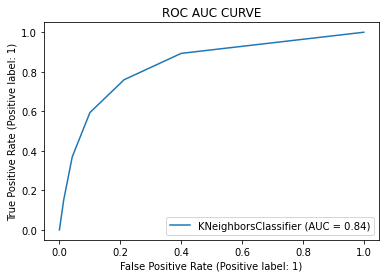

In [108]:
plot_roc_curve(KN,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show()

Model give auc score 84% 

# MODEL-->ADA BOOST CLASIIFIER

In [109]:
max_acc=0
max_rand=0
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    AD.fit(x_train,y_train)
    pred=AD.predict(x_test)
    accuracy=accuracy_score(y_test,pred)*100
    print(f"At random_state {i} model give accuracy--> {accuracy}")
    if accuracy>max_acc:
        max_acc=accuracy
        max_rand=i
        print(f"Max Accuracy {max_acc} at random_state {max_rand}")
        print('\n')

At random_state 0 model give accuracy--> 83.56879606879608
Max Accuracy 83.56879606879608 at random_state 0


At random_state 1 model give accuracy--> 83.43058968058969
At random_state 2 model give accuracy--> 83.72235872235872
Max Accuracy 83.72235872235872 at random_state 2


At random_state 3 model give accuracy--> 83.2463144963145
At random_state 4 model give accuracy--> 83.38452088452088
At random_state 5 model give accuracy--> 83.53808353808354
At random_state 6 model give accuracy--> 82.95454545454545
At random_state 7 model give accuracy--> 83.61486486486487
At random_state 8 model give accuracy--> 83.72235872235872
At random_state 9 model give accuracy--> 83.82985257985258
Max Accuracy 83.82985257985258 at random_state 9


At random_state 10 model give accuracy--> 83.38452088452088
At random_state 11 model give accuracy--> 84.24447174447175
Max Accuracy 84.24447174447175 at random_state 11


At random_state 12 model give accuracy--> 82.73955773955774
At random_state 13 model g

At random state 30 models give an accuracy score of 84.35%

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=30)
AD.fit(x_train,y_train)
pred=AD.predict(x_test)
print(f"Confusion_Matrix= {confusion_matrix(y_test,pred)}")
print(f"Classification_Report= {classification_report(y_test,pred)}")
print(f"Accuracy_Score= {accuracy_score(y_test,pred)*100}")
print(f"Dataset_Score={AD.score(x_train,y_train)*100}")

Confusion_Matrix= [[4624  345]
 [ 674  869]]
Classification_Report=               precision    recall  f1-score   support

           0       0.87      0.93      0.90      4969
           1       0.72      0.56      0.63      1543

    accuracy                           0.84      6512
   macro avg       0.79      0.75      0.77      6512
weighted avg       0.84      0.84      0.84      6512

Accuracy_Score= 84.3519656019656
Dataset_Score=83.31925675675676


1. Most Precision score from >50K-->72%
2. Most Precision scores from <50K-->87%
3. Avg of total dataset-->79%
4. Accuracy score-->84.35%
5. Train_score-->83.31%

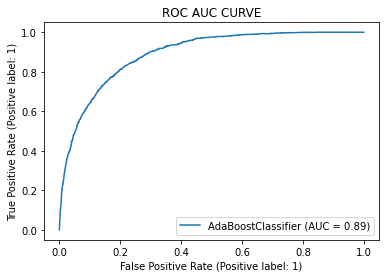

In [111]:
plot_roc_curve(AD,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show()

Model give AUC SCORE 89%

# MODEL-->GRADIENT BOOSTING CLASSIFIER

In [112]:
max_acc=0
max_rand=0
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    GR.fit(x_train,y_train)
    pred=GR.predict(x_test)
    accuracy=accuracy_score(y_test,pred)*100
    print(f"At random_state {i} model give accuracy--> {accuracy}")
    if accuracy>max_acc:
        max_acc=accuracy
        max_rand=i
        print(f"Max Accuracy {max_acc} at random_state {max_rand}")
        print('\n')

At random_state 0 model give accuracy--> 84.16769041769042
Max Accuracy 84.16769041769042 at random_state 0


At random_state 1 model give accuracy--> 84.0448402948403
At random_state 2 model give accuracy--> 84.0909090909091
At random_state 3 model give accuracy--> 83.63022113022113
At random_state 4 model give accuracy--> 83.76842751842752
At random_state 5 model give accuracy--> 84.24447174447175
Max Accuracy 84.24447174447175 at random_state 5


At random_state 6 model give accuracy--> 83.30773955773955
At random_state 7 model give accuracy--> 83.8605651105651
At random_state 8 model give accuracy--> 84.06019656019656
At random_state 9 model give accuracy--> 84.22911547911548
At random_state 10 model give accuracy--> 83.58415233415234
At random_state 11 model give accuracy--> 84.47481572481573
Max Accuracy 84.47481572481573 at random_state 11


At random_state 12 model give accuracy--> 83.06203931203932
At random_state 13 model give accuracy--> 83.49201474201475
At random_state 14 

At random state 30 models give an accuracy score of 84.65%

In [113]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=30)
GR.fit(x_train,y_train)
pred=GR.predict(x_test)
print(f"Confusion_Matrix= {confusion_matrix(y_test,pred)}")
print(f"Classification_Report= {classification_report(y_test,pred)}")
print(f"Accuracy_Score= {accuracy_score(y_test,pred)*100}")
print(f"Dataset_Score={GR.score(x_train,y_train)*100}")

Confusion_Matrix= [[4631  338]
 [ 661  882]]
Classification_Report=               precision    recall  f1-score   support

           0       0.88      0.93      0.90      4969
           1       0.72      0.57      0.64      1543

    accuracy                           0.85      6512
   macro avg       0.80      0.75      0.77      6512
weighted avg       0.84      0.85      0.84      6512

Accuracy_Score= 84.6590909090909
Dataset_Score=84.07171375921376


1. Most Precision score from >50K-->72%
2. Most Precision scores from <50K-->88%
3. Avg of total dataset-->80%
4. Accuracy score-->84.66%
5. Train_score-->84.07%

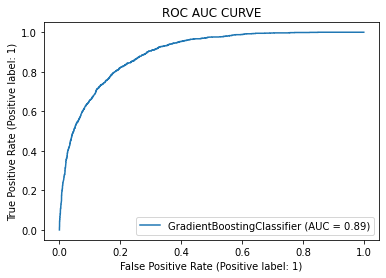

In [115]:
plot_roc_curve(GR,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show()

Model give auc score 89%

# MODEL-->RANDOM FOREST CLASSIFIER

In [116]:
max_acc=0
max_rand=0
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    RF.fit(x_train,y_train)
    pred=RF.predict(x_test)
    accuracy=accuracy_score(y_test,pred)*100
    print(f"At random_state {i} model give accuracy--> {accuracy}")
    if accuracy>max_acc:
        max_acc=accuracy
        max_rand=i
        print(f"Max Accuracy {max_acc} at random_state {max_rand}")
        print('\n')

At random_state 0 model give accuracy--> 81.78746928746928
Max Accuracy 81.78746928746928 at random_state 0


At random_state 1 model give accuracy--> 82.53992628992629
Max Accuracy 82.53992628992629 at random_state 1


At random_state 2 model give accuracy--> 81.86425061425061
At random_state 3 model give accuracy--> 81.66461916461917
At random_state 4 model give accuracy--> 82.01781326781327
At random_state 5 model give accuracy--> 82.10995085995087
At random_state 6 model give accuracy--> 81.2039312039312
At random_state 7 model give accuracy--> 81.89496314496314
At random_state 8 model give accuracy--> 81.75675675675676
At random_state 9 model give accuracy--> 81.61855036855037
At random_state 10 model give accuracy--> 81.58783783783784
At random_state 11 model give accuracy--> 81.2960687960688
At random_state 12 model give accuracy--> 80.52825552825553
At random_state 13 model give accuracy--> 81.2960687960688
At random_state 14 model give accuracy--> 81.87960687960688
At random_s

At random state 1 models give an accuracy score of 82.53%

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print(f"Confusion_Matrix= {confusion_matrix(y_test,pred)}")
print(f"Classification_Report= {classification_report(y_test,pred)}")
print(f"Accuracy_Score= {accuracy_score(y_test,pred)*100}")
print(f"Dataset_Score={RF.score(x_train,y_train)*100}")

Confusion_Matrix= [[4496  494]
 [ 657  865]]
Classification_Report=               precision    recall  f1-score   support

           0       0.87      0.90      0.89      4990
           1       0.64      0.57      0.60      1522

    accuracy                           0.82      6512
   macro avg       0.75      0.73      0.74      6512
weighted avg       0.82      0.82      0.82      6512

Accuracy_Score= 82.32493857493857
Dataset_Score=96.5102886977887


1. Most Precision score from >50K-->64%
2. Most Precision scores from <50K-->87%
3. Avg of total dataset-->75%
4. Accuracy score-->82.32%
5. Train_score-->96.51%

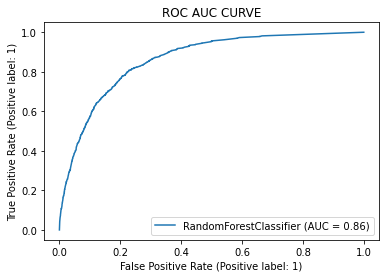

In [118]:
plot_roc_curve(RF,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show()

Model give AUC SCORE 86%

# By train_test_split method we find our best model-->RGRADIENT BOOSTING CLASSIFIER
Avg of total dataset-->80%
Accuracy score-->84.66%
Train_score-->84.07%
AUC SCORE-->89%
All values are higher compare to another model

# Try another method for finding best model

# CROSS VAL SCORE METHOD

# CV-->LOGISTIC REGRESSION

In [119]:
pred=LO.predict(x_test)
for i in range(2,10):
    test_accuracy=accuracy_score(y_test,pred) 
    cv_score=cross_val_score(LO,x,y,cv=i)
    Accuracy=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  CV {i},and the mean_score is:{Accuracy} and the test accuracy is {test_accuracy}')
    print('\n')

At cross fold  CV 2,and the mean_score is:0.801566339066339 and the test accuracy is 0.807585995085995


At cross fold  CV 3,and the mean_score is:0.8019349126420118 and the test accuracy is 0.807585995085995


At cross fold  CV 4,and the mean_score is:0.8016584766584767 and the test accuracy is 0.807585995085995


At cross fold  CV 5,and the mean_score is:0.8023341523341523 and the test accuracy is 0.807585995085995


At cross fold  CV 6,and the mean_score is:0.8021807523249814 and the test accuracy is 0.807585995085995


At cross fold  CV 7,and the mean_score is:0.8020578618237143 and the test accuracy is 0.807585995085995


At cross fold  CV 8,and the mean_score is:0.8019348894348894 and the test accuracy is 0.807585995085995


At cross fold  CV 9,and the mean_score is:0.8020884155119439 and the test accuracy is 0.807585995085995




At cv=5 model give 80.23% and accuracy_score-->80.75%

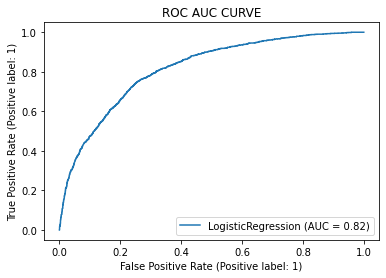

In [120]:
plot_roc_curve(LO,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show()

Model give AUC SCORE 82%

# CV-->DECISION TREE CLASSIFIER

In [121]:
pred=DT.predict(x_test)
for i in range(2,10):
    test_accuracy=accuracy_score(y_test,pred) 
    cv_score=cross_val_score(DT,x,y,cv=i)
    Accuracy=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  CV {i},and the mean_score is:{Accuracy} and the test accuracy is {test_accuracy}')
    print('\n')

At cross fold  CV 2,and the mean_score is:0.7745085995085995 and the test accuracy is 0.933968058968059


At cross fold  CV 3,and the mean_score is:0.7783477399447428 and the test accuracy is 0.933968058968059


At cross fold  CV 4,and the mean_score is:0.7800675675675676 and the test accuracy is 0.933968058968059


At cross fold  CV 5,and the mean_score is:0.7799447174447174 and the test accuracy is 0.933968058968059


At cross fold  CV 6,and the mean_score is:0.7814189814149776 and the test accuracy is 0.933968058968059


At cross fold  CV 7,and the mean_score is:0.7801908292806707 and the test accuracy is 0.933968058968059


At cross fold  CV 8,and the mean_score is:0.7796990171990172 and the test accuracy is 0.933968058968059


At cross fold  CV 9,and the mean_score is:0.7831388696618351 and the test accuracy is 0.933968058968059




At cv=9 model give 78.31% and accuracy_score-->93.39%

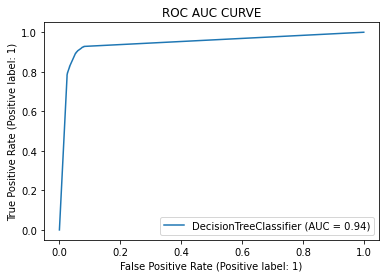

In [122]:
plot_roc_curve(DT,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show()

Model give AUC SCORE 94%

# CV-->SUPPORT VECTOR CLASSIFIER

In [123]:
pred=SV.predict(x_test)
for i in range(2,10):
    test_accuracy=accuracy_score(y_test,pred) 
    cv_score=cross_val_score(SV,x,y,cv=i)
    Accuracy=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  CV {i},and the mean_score is:{Accuracy} and the test accuracy is {test_accuracy}')
    print('\n')

At cross fold  CV 2,and the mean_score is:0.8221130221130221 and the test accuracy is 0.8321560196560197


At cross fold  CV 3,and the mean_score is:0.8234644325548722 and the test accuracy is 0.8321560196560197


At cross fold  CV 4,and the mean_score is:0.8240171990171989 and the test accuracy is 0.8321560196560197


At cross fold  CV 5,and the mean_score is:0.8235257985257987 and the test accuracy is 0.8321560196560197


At cross fold  CV 6,and the mean_score is:0.8234645985283388 and the test accuracy is 0.8321560196560197


At cross fold  CV 7,and the mean_score is:0.8240174035927886 and the test accuracy is 0.8321560196560197


At cross fold  CV 8,and the mean_score is:0.8239250614250614 and the test accuracy is 0.8321560196560197


At cross fold  CV 9,and the mean_score is:0.8238943144926545 and the test accuracy is 0.8321560196560197




At cv=7 model give 82.40% and accuracy_score-->83.21%

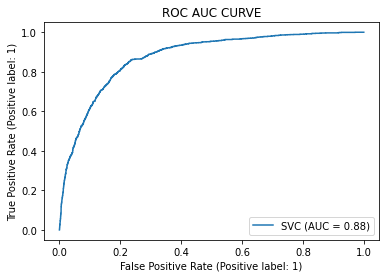

In [124]:
plot_roc_curve(SV,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show()

Model give AUC SCORE 86%

# CV-->KNEIGHBORS CLASSIFIER

In [125]:
pred=KN.predict(x_test)
for i in range(2,10):
    test_accuracy=accuracy_score(y_test,pred) 
    cv_score=cross_val_score(KN,x,y,cv=i)
    Accuracy=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  CV {i},and the mean_score is:{Accuracy} and the test accuracy is {test_accuracy}')
    print('\n')

At cross fold  CV 2,and the mean_score is:0.8097051597051597 and the test accuracy is 0.8591830466830467


At cross fold  CV 3,and the mean_score is:0.8126536943524215 and the test accuracy is 0.8591830466830467


At cross fold  CV 4,and the mean_score is:0.8110565110565111 and the test accuracy is 0.8591830466830467


At cross fold  CV 5,and the mean_score is:0.8115171990171989 and the test accuracy is 0.8591830466830467


At cross fold  CV 6,and the mean_score is:0.8120395030576276 and the test accuracy is 0.8591830466830467


At cross fold  CV 7,and the mean_score is:0.8117324213521039 and the test accuracy is 0.8591830466830467


At cross fold  CV 8,and the mean_score is:0.8113022113022113 and the test accuracy is 0.8591830466830467


At cross fold  CV 9,and the mean_score is:0.8122852069772615 and the test accuracy is 0.8591830466830467




At cv=3 model give 81.26% and accuracy_score-->85.91%

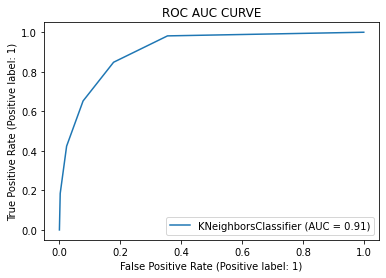

In [126]:
plot_roc_curve(KN,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show()

Model give AUC SCOER 91%

# CV--->ADA BOOST CLASSIFIER

In [127]:
pred=AD.predict(x_test)
for i in range(2,10):
    test_accuracy=accuracy_score(y_test,pred) 
    cv_score=cross_val_score(AD,x,y,cv=i)
    Accuracy=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  CV {i},and the mean_score is:{Accuracy} and the test accuracy is {test_accuracy}')
    print('\n')

At cross fold  CV 2,and the mean_score is:0.8338759213759214 and the test accuracy is 0.8366093366093366


At cross fold  CV 3,and the mean_score is:0.8350737861642598 and the test accuracy is 0.8366093366093366


At cross fold  CV 4,and the mean_score is:0.8361486486486487 and the test accuracy is 0.8366093366093366


At cross fold  CV 5,and the mean_score is:0.8339987714987714 and the test accuracy is 0.8366093366093366


At cross fold  CV 6,and the mean_score is:0.835596157676168 and the test accuracy is 0.8366093366093366


At cross fold  CV 7,and the mean_score is:0.83541191768146 and the test accuracy is 0.8366093366093366


At cross fold  CV 8,and the mean_score is:0.8341830466830467 and the test accuracy is 0.8366093366093366


At cross fold  CV 9,and the mean_score is:0.8351965278309504 and the test accuracy is 0.8366093366093366




At cv=6 model give 83.55% and accuracy_score-->83.66%

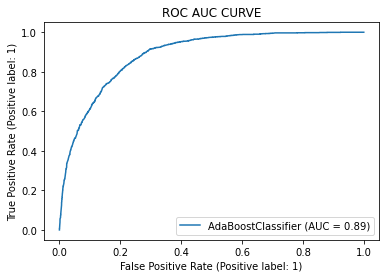

In [128]:
plot_roc_curve(AD,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show()

Model give AUC SCORE 89%

# CV-->GRADIENT BOOSTING CLASSIFIER

In [129]:
pred=GR.predict(x_test)
for i in range(2,10):
    test_accuracy=accuracy_score(y_test,pred) 
    cv_score=cross_val_score(GR,x,y,cv=i)
    Accuracy=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  CV {i},and the mean_score is:{Accuracy} and the test accuracy is {test_accuracy}')
    print('\n')

At cross fold  CV 2,and the mean_score is:0.8378378378378378 and the test accuracy is 0.8433660933660934


At cross fold  CV 3,and the mean_score is:0.8386057649320865 and the test accuracy is 0.8433660933660934


At cross fold  CV 4,and the mean_score is:0.8382985257985258 and the test accuracy is 0.8433660933660934


At cross fold  CV 5,and the mean_score is:0.8390970515970515 and the test accuracy is 0.8433660933660934


At cross fold  CV 6,and the mean_score is:0.8386366190009847 and the test accuracy is 0.8433660933660934


At cross fold  CV 7,and the mean_score is:0.8395887775738039 and the test accuracy is 0.8433660933660934


At cross fold  CV 8,and the mean_score is:0.8390049140049141 and the test accuracy is 0.8433660933660934


At cross fold  CV 9,and the mean_score is:0.8383292937416157 and the test accuracy is 0.8433660933660934




At cv=7 model give 83.95% and accuracy_score-->84.33%

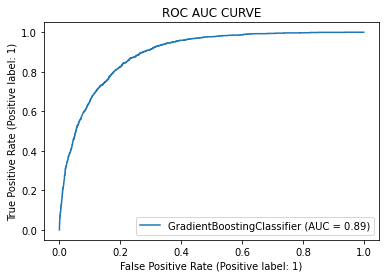

In [130]:
plot_roc_curve(GR,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show()

Model give AUC SCORE 89%

# CV-->RANDOM FOREST CLASSIFIER

In [131]:
pred=RF.predict(x_test)
for i in range(2,10):
    test_accuracy=accuracy_score(y_test,pred) 
    cv_score=cross_val_score(RF,x,y,cv=i)
    Accuracy=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  CV {i},and the mean_score is:{Accuracy} and the test accuracy is {test_accuracy}')
    print('\n')

At cross fold  CV 2,and the mean_score is:0.8164926289926291 and the test accuracy is 0.8232493857493858


At cross fold  CV 3,and the mean_score is:0.8158783997253433 and the test accuracy is 0.8232493857493858


At cross fold  CV 4,and the mean_score is:0.8161855036855037 and the test accuracy is 0.8232493857493858


At cross fold  CV 5,and the mean_score is:0.8166154791154792 and the test accuracy is 0.8232493857493858


At cross fold  CV 6,and the mean_score is:0.8168919942749836 and the test accuracy is 0.8232493857493858


At cross fold  CV 7,and the mean_score is:0.8168306694382503 and the test accuracy is 0.8232493857493858


At cross fold  CV 8,and the mean_score is:0.8161240786240787 and the test accuracy is 0.8232493857493858


At cross fold  CV 9,and the mean_score is:0.8157558324285283 and the test accuracy is 0.8232493857493858




At cv=6 model give 81.68% and accuracy_score-->82.32%

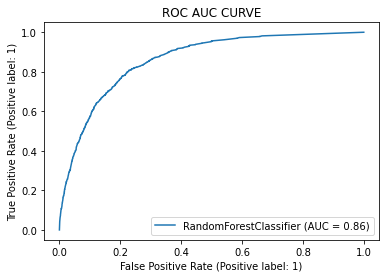

In [133]:
plot_roc_curve(RF,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show()

Model Give AUC SCORE 86%

# By cross validation score method we get best---> method GRADIENT BOOSTING CLASSIFIER
CV_SCORE-->83.95%
ACCURACY-->84.33%
BOTH ARE HIGHEST AND DIFFRENCE BETWEEN IN CV_SCORE AND ACCURACY IS VERY LOW

In [134]:
dict1={'criterion':['squared_error','mse'],'max_features':['sqrt','log2'],'n_estimators':[100,200,300,400,500],
      'max_depth':[3,4,5,6,7]}

In [135]:
Gs=GridSearchCV(GR,dict1,cv=7)
Gs

GridSearchCV(cv=7, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['squared_error', 'mse'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [ ]:
Gs.fit(x,y)

In [ ]:
Gs.best_params_

In [ ]:
Gs.best_score_

In [ ]:
Gs.best_estimator_

# Analyse model with full feature

In [ ]:
GR=GradientBoostingClassifier(criterion='mse',max_features='sqrt',n_estimators=200,max_depth=7)
GR.fit(x_train,y_train)
pred_test=GR.predict(x_test)
print(f"Confusion Matrix : {confusion_matrix(y_test,pred_test)}")
print(f"Classification Report : {classification_report(y_test,pred_test)}")
print(f"Accuracy Score of Model  : {(accuracy_score(y_test,pred_test)*100)}")
print(f"Dataset Score : {(GR.score(x_train,y_train))*100}")

Here by grid searchCV model selection we find best accuracy for model GRADIENT BOOSTING CLASSIFIER Avg 0.86 Accuracy score 86.92 Dataset score 87.28

# Save the best model

In [ ]:
import joblib

In [ ]:
joblib.dump(Gs.best_estimator_,'power.pkl')